Reference Links:
1. For KPI understanding used Sheeba Varghese's project of the same dataset.
Link: https://github.com/sheebavar/Real-Estate-statistical-model-and-analysis/blob/master/Real%20Estate-%20Data%20model%20-%20Regression%20-%20Project%201.ipynb
2. Second Source for KPI from Sridhar Mothe:
Link: https://github.com/me2learn/Capstone_Project_REALESTATE/blob/master/Real_Estate_Case_study_simplilearn_Capstone1.ipynb
2. Population Density Formula
https://www.wikihow.com/images/thumb/e/e2/Calculate-Population-Density-Step-4-Version-3.jpg/v4-460px-Calculate-Population-Density-Step-4-Version-3.jpg.webp

# Approach

1.	Import data 

2.	Figure out the primary key and look for the requirement of indexing

3.	Gauge the fill rate of the variables and devise plans for missing value treatment. Please explain explicitly the reason for the treatment chosen for each variable. 

4.	Understanding homeowner costs are incredibly valuable because it is positively correlated to consumer spending which drives the economy through disposable income. Pe rform debt analysis. You may want to follow the following steps:

5.	Perform EDA and come out with insights into population density and age. You may require deriving new fields (Make sure to weight averages for accurate measurements): 

6.	Create bins for population into a new variable by selecting appropriate class interval so that the no of categories(bins) don’t exceed 5 for the ease of analysis. Analyze the married, separated and divorced population for these population brackets. Visualize using appropriate chart type.

7.	Please detail your observations for rent as a percentage of income at an overall level and for different states.

8.	Perform correlation analysis for all the relevant variables by creating a heatmap. Describe your findings. 

9.	The economic multivariate data has a significant number of measured variables. The goal is to find where the measured variables depend on a number of smaller unobserved common factors or latent variables. Each variable is assumed to depend on a linear combination of the common factors, and the coefficients are known as loadings. Each measured variable also includes a component due to independent random variability, known as "specific variance" because it is specific to one variable. Obtain the common factors and then plot the loadings. Use factor analysis to find latent variables in our dataset and gain insight into the linear relationships in the data

10.	Build a linear Regression model to predict the total monthly expenditure for home mortgages loan; please refer - ‘deplotment_RE.xlsx’. 

# Step 1: Import Data and Basic analysis

In [104]:
# Importing splitting data methods
from sklearn.model_selection import train_test_split, cross_validate

# Importing Libraries for Regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import statsmodels.api as sm

# Importing libraries for scaling
from sklearn.preprocessing import StandardScaler

# Importing methods for prediction scores
from statsmodels.stats.outliers_influence import variance_inflation_factor # for multicollinearity check
from sklearn.metrics import r2_score

# Importing data analysis libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# importing warnings
import warnings

In [2]:
# setting options
pd.set_option('display.max_columns', None)

In [3]:
train = pd.read_csv('../Datasets/train.csv')

In [4]:
test = pd.read_csv('../Datasets/test.csv')

In [5]:
train.head()

UID  BLOCKID  SUMLEVEL  COUNTYID  STATEID        state state_ab  \
0  267822      NaN       140        53       36     New York       NY   
1  246444      NaN       140       141       18      Indiana       IN   
2  245683      NaN       140        63       18      Indiana       IN   
3  279653      NaN       140       127       72  Puerto Rico       PR   
4  247218      NaN       140       161       20       Kansas       KS   

         city           place   type primary  zip_code  area_code        lat  \
0    Hamilton        Hamilton   City   tract     13346        315  42.840812   
1  South Bend        Roseland   City   tract     46616        574  41.701441   
2    Danville        Danville   City   tract     46122        317  39.792202   
3    San Juan        Guaynabo  Urban   tract       927        787  18.396103   
4   Manhattan  Manhattan City   City   tract     66502        785  39.195573   

         lng        ALand   AWater   pop  male_pop  female_pop  rent_mean  \
0 -75.501524  202183361.0  1699120  5230      2612        2618  769.38638   
1 -86.266614    1560828.0   100363  2633      1349        1284  804.87924   
2 -86.515246   69561595.0   284193  6881      3643        3238  742.77365   
3 -66.104169    1105793.0        0  2700      1141        1559  803.42018   
4 -96.569366    2554403.0        0  5637      2586        3051  938.56493   

   rent_median  rent_stdev  rent_sample_weight  rent_samples  rent_gt_10  \
0        784.0   232.63967           272.34441         362.0     0.86761   
1        848.0   253.46747           312.58622         513.0     0.97410   
2        703.0   323.39011           291.85520         378.0     0.95238   
3        782.0   297.39258           259.30316         368.0     0.94693   
4        881.0   392.44096          1005.42886        1704.0     0.99286   

   rent_gt_15  rent_gt_20  rent_gt_25  rent_gt_30  rent_gt_35  rent_gt_40  \
0     0.79155     0.59155     0.45634     0.42817     0.18592     0.15493   
1     0.93227     0.69920     0.69920     0.55179     0.41235     0.39044   
2     0.88624     0.79630     0.66667     0.39153     0.39153     0.28307   
3     0.87151     0.69832     0.61732     0.51397     0.46927     0.35754   
4     0.98247     0.91688     0.84740     0.78247     0.60974     0.55455   

   rent_gt_50  universe_samples  used_samples      hi_mean  hi_median  \
0     0.12958               387           355  63125.28406    48120.0   
1     0.27888               542           502  41931.92593    35186.0   
2     0.15873               459           378  84942.68317    74964.0   
3     0.32961               438           358  48733.67116    37845.0   
4     0.44416              1725          1540  31834.15466    22497.0   

      hi_stdev  hi_sample_weight  hi_samples  family_mean  family_median  \
0  49042.01206        1290.96240      2024.0  67994.14790        53245.0   
1  31639.50203         838.74664      1127.0  50670.10337        43023.0   
2  56811.62186        1155.20980      2488.0  95262.51431        85395.0   
3  45100.54010         928.32193      1267.0  56401.68133        44399.0   
4  34046.50907        1548.67477      1983.0  54053.42396        50272.0   

   family_stdev  family_sample_weight  family_samples  hc_mortgage_mean  \
0   47667.30119             884.33516          1491.0        1414.80295   
1   34715.57548             375.28798           554.0         864.41390   
2   49292.67664             709.74925          1889.0        1506.06758   
3   41082.90515             490.18479           729.0        1175.28642   
4   39609.12605             244.08903           395.0        1192.58759   

   hc_mortgage_median  hc_mortgage_stdev  hc_mortgage_sample_weight  \
0              1223.0          641.22898                  377.83135   
1               784.0          482.27020                  316.88320   
2              1361.0          731.89394                  699.41354   
3              1101.0          428.98751                  261.28471   
4

In [6]:
test.head()

UID  BLOCKID  SUMLEVEL  COUNTYID  STATEID         state state_ab  \
0  255504      NaN       140       163       26      Michigan       MI   
1  252676      NaN       140         1       23         Maine       ME   
2  276314      NaN       140        15       42  Pennsylvania       PA   
3  248614      NaN       140       231       21      Kentucky       KY   
4  286865      NaN       140       355       48         Texas       TX   

             city                  place     type primary  zip_code  \
0         Detroit  Dearborn Heights City      CDP   tract     48239   
1          Auburn            Auburn City     City   tract      4210   
2       Pine City              Millerton  Borough   tract     14871   
3      Monticello        Monticello City     City   tract     42633   
4  Corpus Christi                  Edroy     Town   tract     78410   

   area_code        lat        lng      ALand   AWater   pop  male_pop  \
0        313  42.346422 -83.252823    2711280    39555  3417      1479   
1        207  44.100724 -70.257832   14778785  2705204  3796      1846   
2        607  41.948556 -76.783808  258903666   863840  3944      2065   
3        606  36.746009 -84.766870  501694825  2623067  2508      1427   
4        361  27.882461 -97.678586   13796057   497689  6230      3274   

   female_pop   rent_mean  rent_median  rent_stdev  rent_sample_weight  \
0        1938   858.57169        859.0   232.39082           276.07497   
1        1950   832.68625        750.0   267.22342           183.32299   
2        1879   816.00639        755.0   416.25699           141.39063   
3        1081   418.68937        385.0   156.92024            88.95960   
4        2956  1031.63763        997.0   326.76727           277.39844   

   rent_samples  rent_gt_10  rent_gt_15  rent_gt_20  rent_gt_25  rent_gt_30  \
0         424.0     1.00000     0.95696     0.85316     0.85316     0.85316   
1         245.0     1.00000     1.00000     0.86611     0.67364     0.30962   
2         217.0     0.97573     0.93204     0.78641     0.71845     0.63592   
3          93.0     1.00000     0.93548     0.93548     0.64516     0.55914   
4         624.0     0.72276     0.66506     0.53526     0.38301     0.18910   

   rent_gt_35  rent_gt_40  rent_gt_50  universe_samples  used_samples  \
0     0.85316     0.76962     0.63544               435           395   
1     0.30962     0.30962     0.27197               275           239   
2     0.47573     0.43689     0.32524               245           206   
3     0.46237     0.46237     0.36559               153            93   
4     0.16667     0.14263     0.11058               660           624   

        hi_mean  hi_median     hi_stdev  hi_sample_weight  hi_samples  \
0   48899.52121    38746.0  44392.20902         798.02401      1180.0   
1   72335.33234    61008.0  51895.81159         922.82969      1722.0   
2   58501.15901    51648.0  45245.27248         893.07759      1461.0   
3   38237.55059    31612.0  34527.61607         775.17947       957.0   
4  114456.07790    94211.0  81950.95692         836.30759      2404.0   

    family_mean  family_median  family_stdev  family_sample_weight  \
0   53802.87122        45167.0   43756.56479             464.30972   
1   85642.22095        74759.0   49156.72870             482.99945   
2   65694.06582        57186.0   44239.31893             619.73962   
3   44156.38709        34687.0   34899.74300             535.21987   
4  123527.02420       103898.0   72173.55823             507.42257   

   family_samples  hc_mortgage_mean  hc_mortgage_median  hc_mortgage_stdev  \
0           769.0        1139.24548              1109.0          336.47710   
1          1147.0        1533.25988              1438.0          536.61118   
2          1084.0        1254.54462              1089.0          596.85204   
3           689.0         862.65763               749.0          624.42157   
4          1738.0        1996.41425              1907.0          740.21168   

 

# Step 2:Figure out the primary key and look for the requirement of indexing

There are two ID columns here, UID and BLOCKID

In [7]:
train['UID'].value_counts()

282028    4
230058    4
285596    3
235725    3
268775    3
         ..
254569    1
260714    1
246381    1
273008    1
268291    1
Name: UID, Length: 27161, dtype: int64

In [8]:
train['BLOCKID'].value_counts()

Series([], Name: BLOCKID, dtype: int64)

BLOCKID is completely empty. There are some duplicate values in UID

In [9]:
train.drop_duplicates('UID', inplace=True)

In [10]:
train.drop('BLOCKID', axis=1, inplace=True)
test.drop('BLOCKID', axis=1, inplace=True)

In [11]:
test.drop_duplicates('UID', inplace=True)

In [12]:
train.set_index('UID', inplace=True)

In [13]:
test.set_index('UID', inplace=True)

In [14]:
train.head()

SUMLEVEL  COUNTYID  STATEID        state state_ab        city  \
UID                                                                     
267822       140        53       36     New York       NY    Hamilton   
246444       140       141       18      Indiana       IN  South Bend   
245683       140        63       18      Indiana       IN    Danville   
279653       140       127       72  Puerto Rico       PR    San Juan   
247218       140       161       20       Kansas       KS   Manhattan   

                 place   type primary  zip_code  area_code        lat  \
UID                                                                     
267822        Hamilton   City   tract     13346        315  42.840812   
246444        Roseland   City   tract     46616        574  41.701441   
245683        Danville   City   tract     46122        317  39.792202   
279653        Guaynabo  Urban   tract       927        787  18.396103   
247218  Manhattan City   City   tract     66502        785  39.195573   

              lng        ALand   AWater   pop  male_pop  female_pop  \
UID                                                                   
267822 -75.501524  202183361.0  1699120  5230      2612        2618   
246444 -86.266614    1560828.0   100363  2633      1349        1284   
245683 -86.515246   69561595.0   284193  6881      3643        3238   
279653 -66.104169    1105793.0        0  2700      1141        1559   
247218 -96.569366    2554403.0        0  5637      2586        3051   

        rent_mean  rent_median  rent_stdev  rent_sample_weight  rent_samples  \
UID                                                                            
267822  769.38638        784.0   232.63967           272.34441         362.0   
246444  804.87924        848.0   253.46747           312.58622         513.0   
245683  742.77365        703.0   323.39011           291.85520         378.0   
279653  803.42018        782.0   297.39258           259.30316         368.0   
247218  938.56493        881.0   392.44096          1005.42886        1704.0   

        rent_gt_10  rent_gt_15  rent_gt_20  rent_gt_25  rent_gt_30  \
UID                                                                  
267822     0.86761     0.79155     0.59155     0.45634     0.42817   
246444     0.97410     0.93227     0.69920     0.69920     0.55179   
245683     0.95238     0.88624     0.79630     0.66667     0.39153   
279653     0.94693     0.87151     0.69832     0.61732     0.51397   
247218     0.99286     0.98247     0.91688     0.84740     0.78247   

        rent_gt_35  rent_gt_40  rent_gt_50  universe_samples  used_samples  \
UID                                                                          
267822     0.18592     0.15493     0.12958               387           355   
246444     0.41235     0.39044     0.27888               542           502   
245683     0.39153     0.28307     0.15873               459           378   
279653     0.46927     0.35754     0.32961               438           358   
247218     0.60974     0.55455     0.44416              1725          1540   

            hi_mean  hi_median     hi_stdev  hi_sample_weight  hi_samples  \
UID                                                                         
267822  63125.28406    48120.0  49042.01206        1290.96240      2024.0   
246444  41931.92593    35186.0  31639.50203         838.74664      1127.0   
245683  84942.68317    74964.0  56811.62186        1155.20980      2488.0   
279653  48733.67116    37845.0  45100.54010         928.32193      1267.0   
247218  31834.15466    22497.0  34046.50907        1548.67477      1983.0   

        family_mean  family_median  family_stdev  family_sample_weight  \
UID                                                                      
267822  67994.14790        53245.0   47667.30119             884.33516   
246444  50670.10337        43023.0   34715.57548             375.28798   
245683  95262.51431        85395.0   49292.67664   

In [15]:
test.head()

SUMLEVEL  COUNTYID  STATEID         state state_ab            city  \
UID                                                                          
255504       140       163       26      Michigan       MI         Detroit   
252676       140         1       23         Maine       ME          Auburn   
276314       140        15       42  Pennsylvania       PA       Pine City   
248614       140       231       21      Kentucky       KY      Monticello   
286865       140       355       48         Texas       TX  Corpus Christi   

                        place     type primary  zip_code  area_code  \
UID                                                                   
255504  Dearborn Heights City      CDP   tract     48239        313   
252676            Auburn City     City   tract      4210        207   
276314              Millerton  Borough   tract     14871        607   
248614        Monticello City     City   tract     42633        606   
286865                  Edroy     Town   tract     78410        361   

              lat        lng      ALand   AWater   pop  male_pop  female_pop  \
UID                                                                            
255504  42.346422 -83.252823    2711280    39555  3417      1479        1938   
252676  44.100724 -70.257832   14778785  2705204  3796      1846        1950   
276314  41.948556 -76.783808  258903666   863840  3944      2065        1879   
248614  36.746009 -84.766870  501694825  2623067  2508      1427        1081   
286865  27.882461 -97.678586   13796057   497689  6230      3274        2956   

         rent_mean  rent_median  rent_stdev  rent_sample_weight  rent_samples  \
UID                                                                             
255504   858.57169        859.0   232.39082           276.07497         424.0   
252676   832.68625        750.0   267.22342           183.32299         245.0   
276314   816.00639        755.0   416.25699           141.39063         217.0   
248614   418.68937        385.0   156.92024            88.95960          93.0   
286865  1031.63763        997.0   326.76727           277.39844         624.0   

        rent_gt_10  rent_gt_15  rent_gt_20  rent_gt_25  rent_gt_30  \
UID                                                                  
255504     1.00000     0.95696     0.85316     0.85316     0.85316   
252676     1.00000     1.00000     0.86611     0.67364     0.30962   
276314     0.97573     0.93204     0.78641     0.71845     0.63592   
248614     1.00000     0.93548     0.93548     0.64516     0.55914   
286865     0.72276     0.66506     0.53526     0.38301     0.18910   

        rent_gt_35  rent_gt_40  rent_gt_50  universe_samples  used_samples  \
UID                                                                          
255504     0.85316     0.76962     0.63544               435           395   
252676     0.30962     0.30962     0.27197               275           239   
276314     0.47573     0.43689     0.32524               245           206   
248614     0.46237     0.46237     0.36559               153            93   
286865     0.16667     0.14263     0.11058               660           624   

             hi_mean  hi_median     hi_stdev  hi_sample_weight  hi_samples  \
UID                                                                          
255504   48899.52121    38746.0  44392.20902         798.02401      1180.0   
252676   72335.33234    61008.0  51895.81159         922.82969      1722.0   
276314   58501.15901    51648.0  45245.27248         893.07759      1461.0   
248614   38237.55059    31612.0  34527.61607         775.17947       957.0   
286865  114456.07790    94211.0  81950.95692         836.30759      2404.0   

         family_mean  family_median  family_stdev  family_sample_weight  \
UID                                                                       
255504   53802.87122        45167.0   43756.56479             464.30972   
252676   85642.22095    

# Step3 : Gauge the fill rate of the variables and devise plans for missing value treatment. Please explain explicitly the reason for the treatment chosen for each variable

In [16]:
def view_missing(df):
    missing_df = pd.DataFrame()
    missing_df['Columns'] = df.columns
    missing_df['Missing_Values_Percentage'] = [(i/len(df)) * 100 for i in df.isnull().sum()]
    missing_df['Missing_Values_Percentage'] = round(missing_df['Missing_Values_Percentage'], 2)
    missing_df = missing_df[~(missing_df.Missing_Values_Percentage == 0)]
    return missing_df.sort_values('Missing_Values_Percentage', ascending=False)

In [17]:
view_missing(train)

Columns  Missing_Values_Percentage
49                    hc_median                       1.76
51                   hc_samples                       1.76
48                      hc_mean                       1.76
50                     hc_stdev                       1.76
52             hc_sample_weight                       1.76
43             hc_mortgage_mean                       1.63
47          hc_mortgage_samples                       1.63
46    hc_mortgage_sample_weight                       1.63
45            hc_mortgage_stdev                       1.63
44           hc_mortgage_median                       1.63
56                         debt                       1.33
55                  home_equity                       1.33
54              second_mortgage                       1.33
53  home_equity_second_mortgage                       1.33
57          second_mortgage_cdf                       1.33
58              home_equity_cdf                       1.33
59                     debt_cdf                       1.33
19                  rent_median                       0.89
18                    rent_mean                       0.89
21           rent_sample_weight                       0.89
28                   rent_gt_35                       0.89
20                   rent_stdev                       0.89
22                 rent_samples                       0.89
23                   rent_gt_10                       0.89
24                   rent_gt_15                       0.89
25                   rent_gt_20                       0.89
26                   rent_gt_25                       0.89
27                   rent_gt_30                       0.89
30                   rent_gt_50                       0.89
29                   rent_gt_40                       0.89
40                 family_stdev                       0.85
39                family_median                       0.85
38                  family_mean                       0.85
42               family_samples                       0.85
41         family_sample_weight                       0.85
33                      hi_mean                       0.76
34                    hi_median                       0.76
35                     hi_stdev                       0.76
36             hi_sample_weight                       0.76
37                   hi_samples                       0.76
73                      pct_own                       0.76
62             hs_degree_female                       0.63
69            female_age_median                       0.59
68              female_age_mean                       0.59
72           female_age_samples                       0.59
70             female_age_stdev                       0.59
71     female_age_sample_weight                       0.59
61               hs_degree_male                       0.57
74                      married                       0.55
75                  married_snp                       0.55
76                    separated                       0.55
77                     divorced                       0.55
67             male_age_samples                       0.54
66       male_age_sample_weight                       0.54
64              male_age_median                       0.54
63                male_age_mean                       0.54
65               male_age_stdev                       0.54
60                    hs_degree                       0.53

There is less than 5 percent missing values so we can drop them

In [18]:
train.dropna(inplace=True)

In [19]:
train.head()

SUMLEVEL  COUNTYID  STATEID        state state_ab        city  \
UID                                                                     
267822       140        53       36     New York       NY    Hamilton   
246444       140       141       18      Indiana       IN  South Bend   
245683       140        63       18      Indiana       IN    Danville   
279653       140       127       72  Puerto Rico       PR    San Juan   
247218       140       161       20       Kansas       KS   Manhattan   

                 place   type primary  zip_code  area_code        lat  \
UID                                                                     
267822        Hamilton   City   tract     13346        315  42.840812   
246444        Roseland   City   tract     46616        574  41.701441   
245683        Danville   City   tract     46122        317  39.792202   
279653        Guaynabo  Urban   tract       927        787  18.396103   
247218  Manhattan City   City   tract     66502        785  39.195573   

              lng        ALand   AWater   pop  male_pop  female_pop  \
UID                                                                   
267822 -75.501524  202183361.0  1699120  5230      2612        2618   
246444 -86.266614    1560828.0   100363  2633      1349        1284   
245683 -86.515246   69561595.0   284193  6881      3643        3238   
279653 -66.104169    1105793.0        0  2700      1141        1559   
247218 -96.569366    2554403.0        0  5637      2586        3051   

        rent_mean  rent_median  rent_stdev  rent_sample_weight  rent_samples  \
UID                                                                            
267822  769.38638        784.0   232.63967           272.34441         362.0   
246444  804.87924        848.0   253.46747           312.58622         513.0   
245683  742.77365        703.0   323.39011           291.85520         378.0   
279653  803.42018        782.0   297.39258           259.30316         368.0   
247218  938.56493        881.0   392.44096          1005.42886        1704.0   

        rent_gt_10  rent_gt_15  rent_gt_20  rent_gt_25  rent_gt_30  \
UID                                                                  
267822     0.86761     0.79155     0.59155     0.45634     0.42817   
246444     0.97410     0.93227     0.69920     0.69920     0.55179   
245683     0.95238     0.88624     0.79630     0.66667     0.39153   
279653     0.94693     0.87151     0.69832     0.61732     0.51397   
247218     0.99286     0.98247     0.91688     0.84740     0.78247   

        rent_gt_35  rent_gt_40  rent_gt_50  universe_samples  used_samples  \
UID                                                                          
267822     0.18592     0.15493     0.12958               387           355   
246444     0.41235     0.39044     0.27888               542           502   
245683     0.39153     0.28307     0.15873               459           378   
279653     0.46927     0.35754     0.32961               438           358   
247218     0.60974     0.55455     0.44416              1725          1540   

            hi_mean  hi_median     hi_stdev  hi_sample_weight  hi_samples  \
UID                                                                         
267822  63125.28406    48120.0  49042.01206        1290.96240      2024.0   
246444  41931.92593    35186.0  31639.50203         838.74664      1127.0   
245683  84942.68317    74964.0  56811.62186        1155.20980      2488.0   
279653  48733.67116    37845.0  45100.54010         928.32193      1267.0   
247218  31834.15466    22497.0  34046.50907        1548.67477      1983.0   

        family_mean  family_median  family_stdev  family_sample_weight  \
UID                                                                      
267822  67994.14790        53245.0   47667.30119             884.33516   
246444  50670.10337        43023.0   34715.57548             375.28798   
245683  95262.51431        85395.0   49292.67664   

In [20]:
view_missing(test)

Columns  Missing_Values_Percentage
49                    hc_median                       2.29
48                      hc_mean                       2.29
50                     hc_stdev                       2.29
51                   hc_samples                       2.29
52             hc_sample_weight                       2.29
46    hc_mortgage_sample_weight                       2.10
44           hc_mortgage_median                       2.10
43             hc_mortgage_mean                       2.10
47          hc_mortgage_samples                       2.10
45            hc_mortgage_stdev                       2.10
55                  home_equity                       1.75
54              second_mortgage                       1.75
53  home_equity_second_mortgage                       1.75
57          second_mortgage_cdf                       1.75
58              home_equity_cdf                       1.75
59                     debt_cdf                       1.75
56                         debt                       1.75
28                   rent_gt_35                       1.16
29                   rent_gt_40                       1.16
30                   rent_gt_50                       1.16
27                   rent_gt_30                       1.16
26                   rent_gt_25                       1.16
25                   rent_gt_20                       1.16
24                   rent_gt_15                       1.16
23                   rent_gt_10                       1.16
19                  rent_median                       1.15
18                    rent_mean                       1.15
22                 rent_samples                       1.15
21           rent_sample_weight                       1.15
20                   rent_stdev                       1.15
42               family_samples                       1.07
41         family_sample_weight                       1.07
40                 family_stdev                       1.07
39                family_median                       1.07
38                  family_mean                       1.07
37                   hi_samples                       0.96
36             hi_sample_weight                       0.96
35                     hi_stdev                       0.96
34                    hi_median                       0.96
33                      hi_mean                       0.96
73                      pct_own                       0.96
62             hs_degree_female                       0.82
68              female_age_mean                       0.75
69            female_age_median                       0.75
70             female_age_stdev                       0.75
71     female_age_sample_weight                       0.75
72           female_age_samples                       0.75
61               hs_degree_male                       0.70
60                    hs_degree                       0.67
63                male_age_mean                       0.66
64              male_age_median                       0.66
65               male_age_stdev                       0.66
66       male_age_sample_weight                       0.66
67             male_age_samples                       0.66
74                      married                       0.66
75                  married_snp                       0.66
76                    separated                       0.66
77                     divorced                       0.66

In [21]:
test.dropna(inplace=True)

In [22]:
test.head()

SUMLEVEL  COUNTYID  STATEID         state state_ab            city  \
UID                                                                          
255504       140       163       26      Michigan       MI         Detroit   
252676       140         1       23         Maine       ME          Auburn   
276314       140        15       42  Pennsylvania       PA       Pine City   
248614       140       231       21      Kentucky       KY      Monticello   
286865       140       355       48         Texas       TX  Corpus Christi   

                        place     type primary  zip_code  area_code  \
UID                                                                   
255504  Dearborn Heights City      CDP   tract     48239        313   
252676            Auburn City     City   tract      4210        207   
276314              Millerton  Borough   tract     14871        607   
248614        Monticello City     City   tract     42633        606   
286865                  Edroy     Town   tract     78410        361   

              lat        lng      ALand   AWater   pop  male_pop  female_pop  \
UID                                                                            
255504  42.346422 -83.252823    2711280    39555  3417      1479        1938   
252676  44.100724 -70.257832   14778785  2705204  3796      1846        1950   
276314  41.948556 -76.783808  258903666   863840  3944      2065        1879   
248614  36.746009 -84.766870  501694825  2623067  2508      1427        1081   
286865  27.882461 -97.678586   13796057   497689  6230      3274        2956   

         rent_mean  rent_median  rent_stdev  rent_sample_weight  rent_samples  \
UID                                                                             
255504   858.57169        859.0   232.39082           276.07497         424.0   
252676   832.68625        750.0   267.22342           183.32299         245.0   
276314   816.00639        755.0   416.25699           141.39063         217.0   
248614   418.68937        385.0   156.92024            88.95960          93.0   
286865  1031.63763        997.0   326.76727           277.39844         624.0   

        rent_gt_10  rent_gt_15  rent_gt_20  rent_gt_25  rent_gt_30  \
UID                                                                  
255504     1.00000     0.95696     0.85316     0.85316     0.85316   
252676     1.00000     1.00000     0.86611     0.67364     0.30962   
276314     0.97573     0.93204     0.78641     0.71845     0.63592   
248614     1.00000     0.93548     0.93548     0.64516     0.55914   
286865     0.72276     0.66506     0.53526     0.38301     0.18910   

        rent_gt_35  rent_gt_40  rent_gt_50  universe_samples  used_samples  \
UID                                                                          
255504     0.85316     0.76962     0.63544               435           395   
252676     0.30962     0.30962     0.27197               275           239   
276314     0.47573     0.43689     0.32524               245           206   
248614     0.46237     0.46237     0.36559               153            93   
286865     0.16667     0.14263     0.11058               660           624   

             hi_mean  hi_median     hi_stdev  hi_sample_weight  hi_samples  \
UID                                                                          
255504   48899.52121    38746.0  44392.20902         798.02401      1180.0   
252676   72335.33234    61008.0  51895.81159         922.82969      1722.0   
276314   58501.15901    51648.0  45245.27248         893.07759      1461.0   
248614   38237.55059    31612.0  34527.61607         775.17947       957.0   
286865  114456.07790    94211.0  81950.95692         836.30759      2404.0   

         family_mean  family_median  family_stdev  family_sample_weight  \
UID                                                                       
255504   53802.87122        45167.0   43756.56479             464.30972   
252676   85642.22095    

# Step 4: Understanding homeowner costs are incredibly valuable because it is positively correlated to consumer spending which drives the economy through disposable income. Perform debt analysis. You may want to follow the following steps:

- Explore the top 2,500 locations where the percentage of households with a second mortgage is the highest and percent ownership is above 10%. Visualize using geo-map. You may keep the upper limit for the percent of households with a second mortgage to roughly 50%.

In [23]:
train.second_mortgage.describe()

count    26585.000000
mean         0.029876
std          0.030664
min          0.000000
25%          0.008060
50%          0.022730
75%          0.042900
max          0.608700
Name: second_mortgage, dtype: float64

In [24]:
train.second_mortgage.describe()

count    26585.000000
mean         0.029876
std          0.030664
min          0.000000
25%          0.008060
50%          0.022730
75%          0.042900
max          0.608700
Name: second_mortgage, dtype: float64

In [25]:
topLoc = train[(train.pct_own > 0.1) & (train.second_mortgage < 0.5)]

In [26]:
topLoc_group = topLoc.sort_values(['second_mortgage', 'pct_own'], ascending=False)

In [27]:
top2500 = topLoc_group[:2500]

In [28]:
top2500

SUMLEVEL  COUNTYID  STATEID          state state_ab          city  \
UID                                                                         
251185       140        27       25  Massachusetts       MA     Worcester   
269323       140        81       36       New York       NY        Corona   
251324       140         3       24       Maryland       MD   Glen Burnie   
235788       140        57       12        Florida       FL         Tampa   
242304       140        31       17       Illinois       IL       Chicago   
...          ...       ...      ...            ...      ...           ...   
236853       140        86       12        Florida       FL    Cutler Bay   
287458       140       439       48          Texas       TX        Keller   
271050       140        17       39           Ohio       OH    Middletown   
262770       140         1       34     New Jersey       NJ  Mays Landing   
289137       140        59       51       Virginia       VA         Burke   

                  place     type primary  zip_code  area_code        lat  \
UID                                                                        
251185   Worcester City     City   tract      1610        508  42.254262   
269323     Harbor Hills     City   tract     11368        718  40.751809   
251324      Glen Burnie      CDP   tract     21061        410  39.127273   
235788  Egypt Lake-leto     City   tract     33614        813  28.029063   
242304      Lincolnwood  Village   tract     60640        773  41.967289   
...                 ...      ...     ...       ...        ...        ...   
236853       Cutler Bay     City   tract     33189        305  25.550391   
287458      Keller City     Town   tract     76248        817  32.913822   
271050      Jacksonburg  Village   tract     45042        513  39.556756   
262770     Mays Landing     City   tract      8330        609  39.432879   
289137     Burke Centre     Town   tract     22015        703  38.792277   

              lng       ALand  AWater    pop  male_pop  female_pop  \
UID                                                                  
251185 -71.800347    797165.0       0   2133      1139         994   
269323 -73.853582    169666.0       0   4181      2249        1932   
251324 -76.635265   1110282.0       0   4866      1985        2881   
235788 -82.495395   2050906.0  234794   5468      2784        2684   
242304 -87.652434    159420.0       0   3653      1851        1802   
...           ...         ...     ...    ...       ...         ...   
236853 -80.347791   5973763.0  303353   6082      2846        3236   
287458 -97.204310   5402229.0   39076   6055      2948        3107   
271050 -84.443252  57770725.0  320075   4624      2242        2382   
262770 -74.686137  35788759.0  941328  10140      4931        5209   
289137 -77.282318   2454077.0   34374   4798      2284        2514   

         rent_mean  rent_median  rent_stdev  rent_sample_weight  rent_samples  \
UID                                                                             
251185   942.32740        953.0   304.34109           333.88019         645.0   
269323  1413.12357       1388.0   499.47343           205.65925         777.0   
251324  1335.49818       1335.0   336.92824           352.62444        1502.0   
235788   914.10322        880.0   191.64962          1067.77502        1847.0   
242304   828.26510        666.0   576.38019           888.44081        1398.0   
...            ...          ...         ...                 ...           ...   
236853  1171.16929       1143.0   467.51572           309.85627        1014.0   
287458  3568.54429       3791.0   612.08579             1.47118          24.0   
271050  1034.18493        918.0   429.00225            57.24333         100.0   
262770  1388.74715       1268.0   568.73713           256.56181        1010.0   
289137  2231.80246       2121.0   641.17074            29.01931         298.0   

        rent_gt_10  rent_gt_15  rent_gt_20  rent_gt_

#### Bad debt is the debt you should avoid at all costs such as a second mortgage or home equity loan. Conversely, Good debt is all other debt not including second mortgage or home equity loan.

    Bad Debt Equation:
          Bad Debt = P (Second Mortgage ∩ Home Equity Loan)
          Bad Debt = second_mortgage + home_equity - home_equity_second_mortgage 

In [29]:
train['Bad Debt'] = train.second_mortgage + train.home_equity - train.home_equity_second_mortgage

In [30]:
train['Good_Debt'] = train.debt - train['Bad Debt']

#### Create pie charts (Venn diagram) to show overall debt (% bad and good debt) and bad debt (2 mortgage and home equity loan).

#### Create Box and whisker plot and analyze the distribution for 2nd mortgage, home equity, good debt and bad debt for different cities.

In [31]:
train.city.value_counts()[:20]

Chicago         286
Brooklyn        261
Los Angeles     219
Houston         213
Philadelphia    160
San Antonio     138
Baltimore       128
Las Vegas       123
Phoenix         114
Miami           105
Detroit          99
Bronx            98
Columbus         95
Dallas           95
Springfield      92
Indianapolis     90
San Diego        89
Milwaukee        88
Washington       85
Jacksonville     85
Name: city, dtype: int64

In [32]:
top_cities = ['Chicago', 'Brooklyn', 'Los Angeles', 'Houston', 'Philadelphia', 
              'San Antonio', 'Baltimore', 'Las Vegas', 'Phoenix', 'Miami']

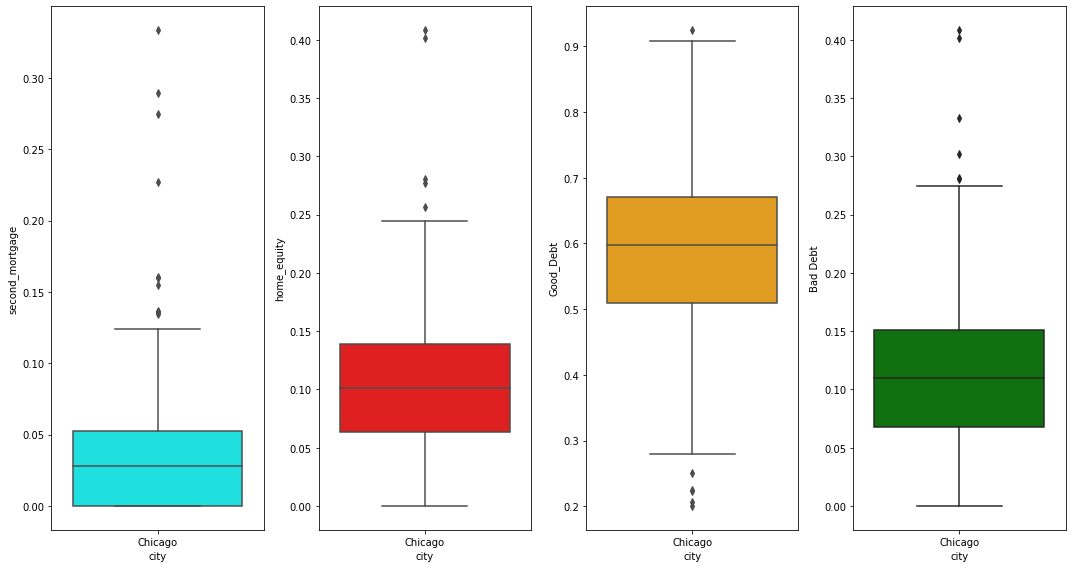

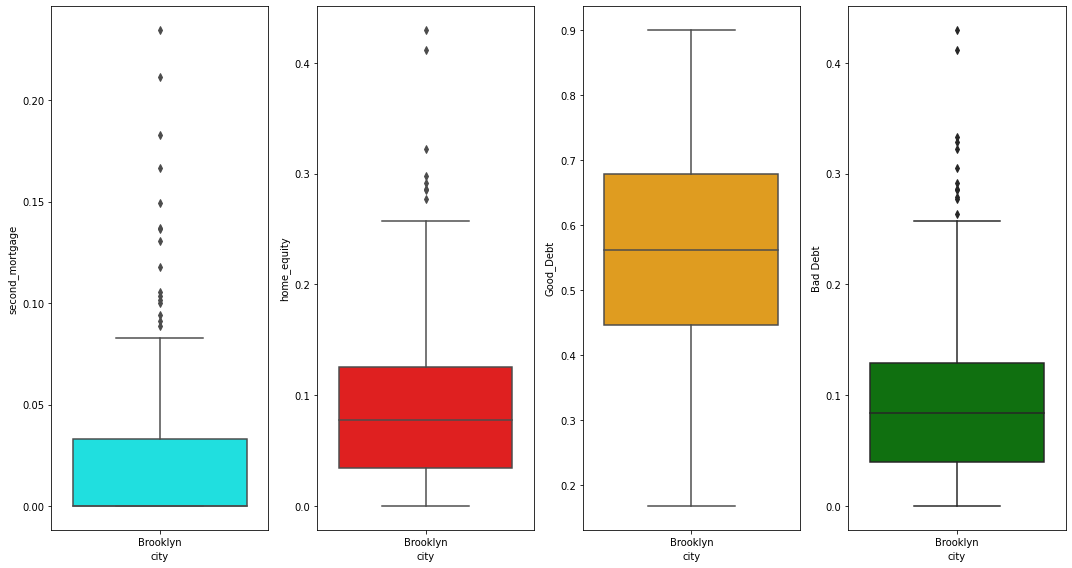

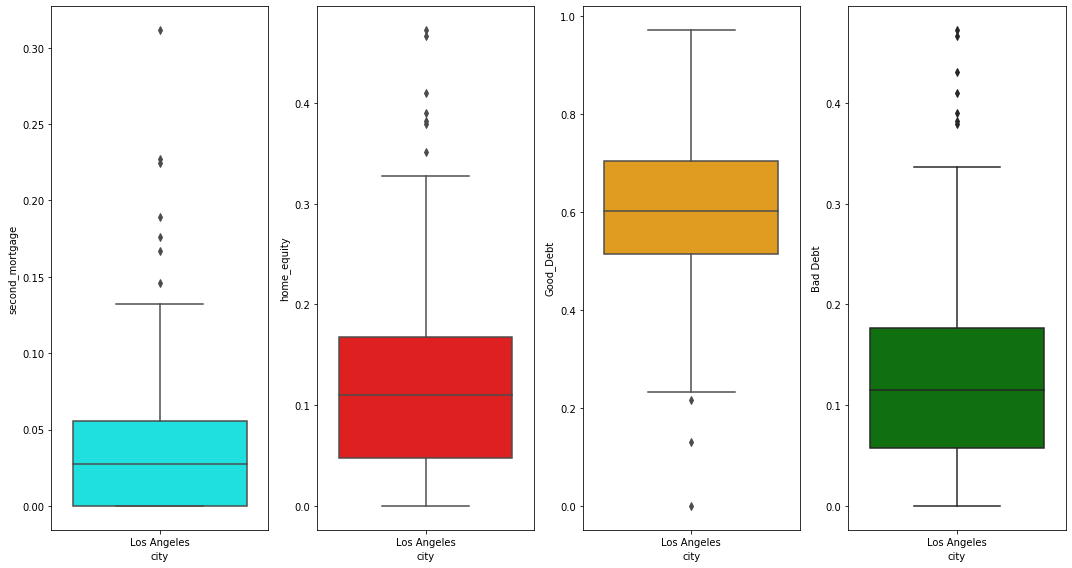

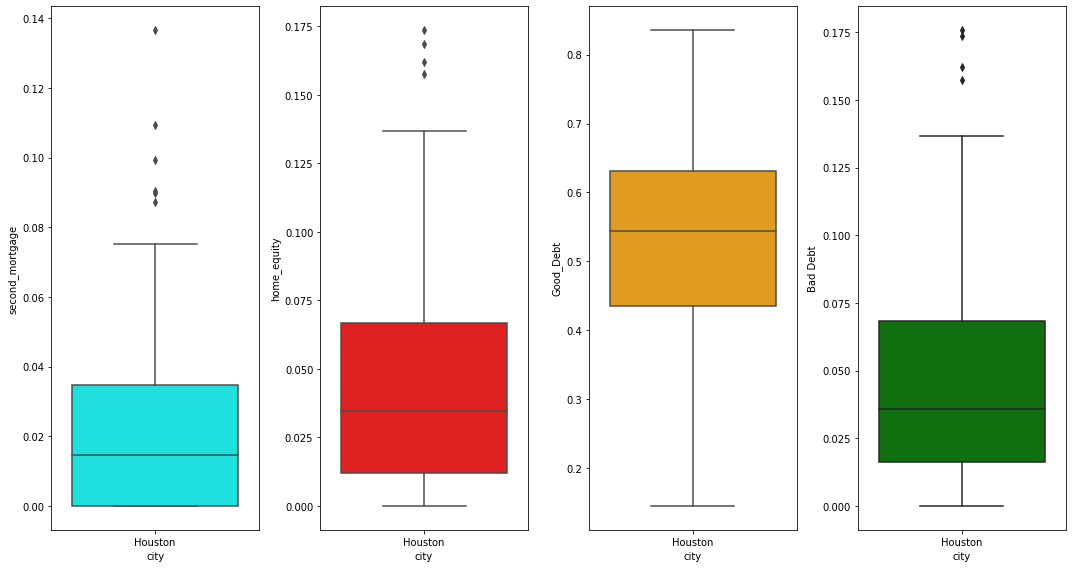

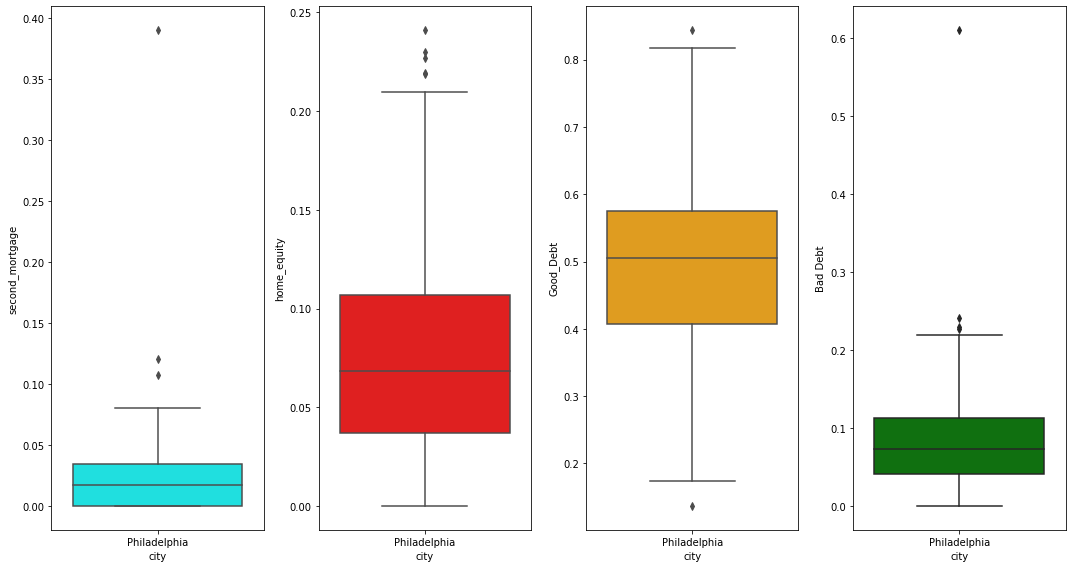

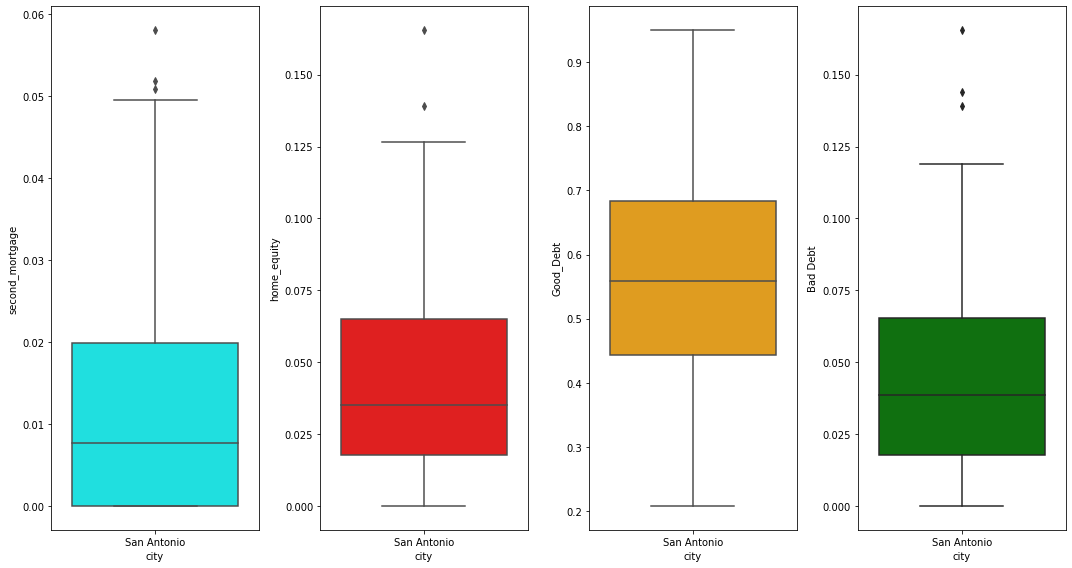

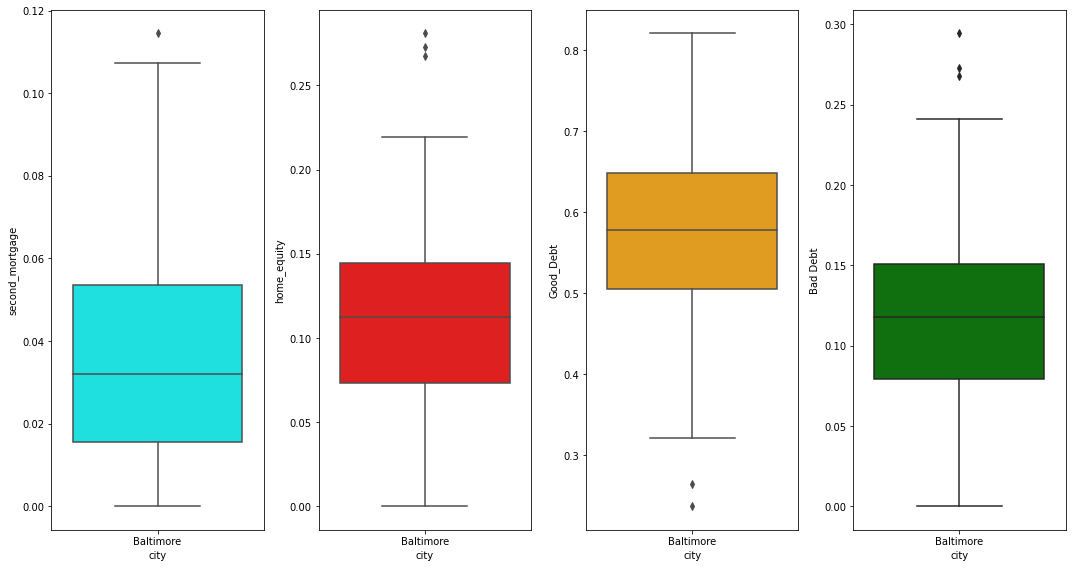

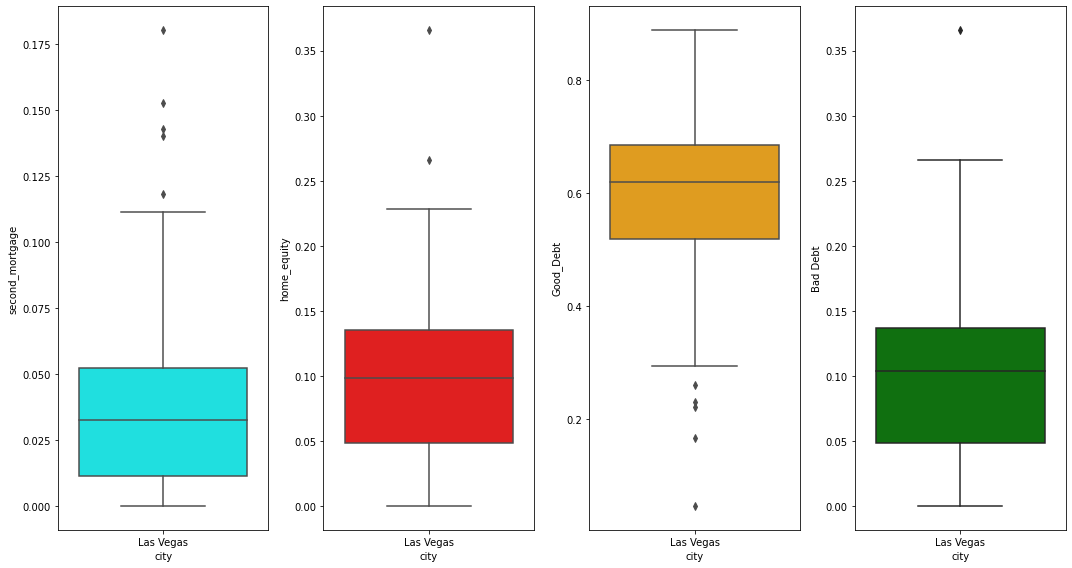

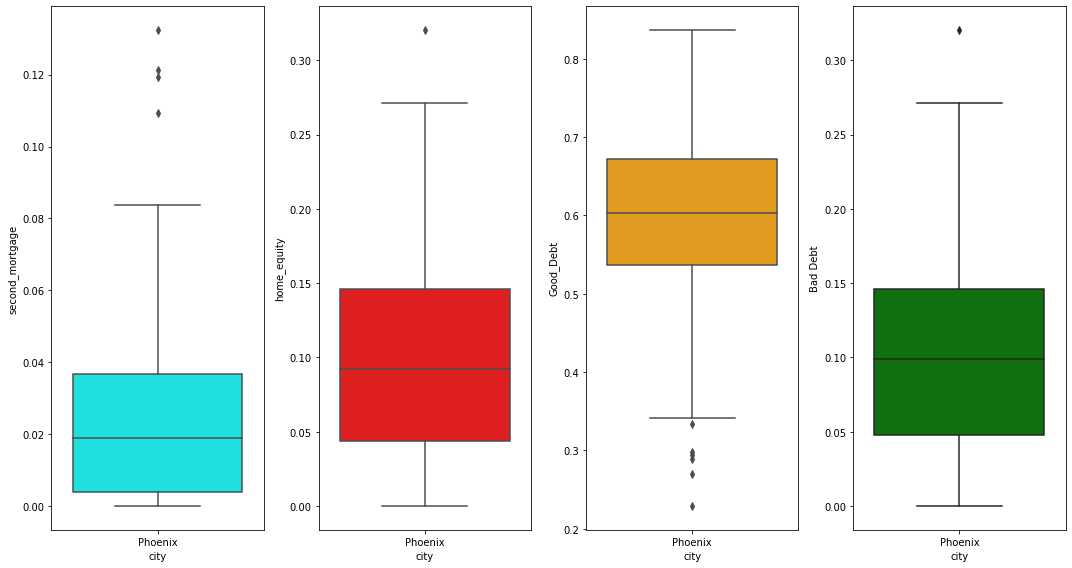

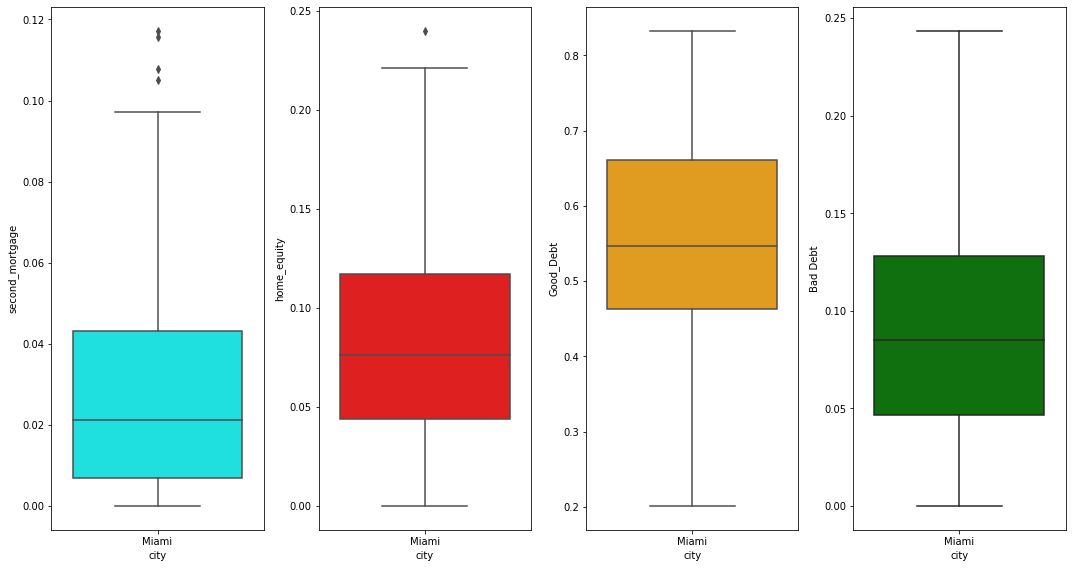

In [33]:
for i in top_cities:
    df = train[train.city == i]
    plt.figure(figsize=(15, 8))
    plt.subplot(1, 4, 1)
    sns.boxplot(df.city, df.second_mortgage, color='cyan')
    plt.subplot(1, 4, 2)
    sns.boxplot(df.city, df.home_equity, color='red')
    plt.subplot(1, 4, 3)
    sns.boxplot(df.city, df['Good_Debt'], color='orange')
    plt.subplot(1, 4, 4)
    sns.boxplot(df.city, df['Bad Debt'], color='green')
    plt.tight_layout()
    plt.show()

#### Create a collated income distribution chart for family income, house hold income and remaining income.

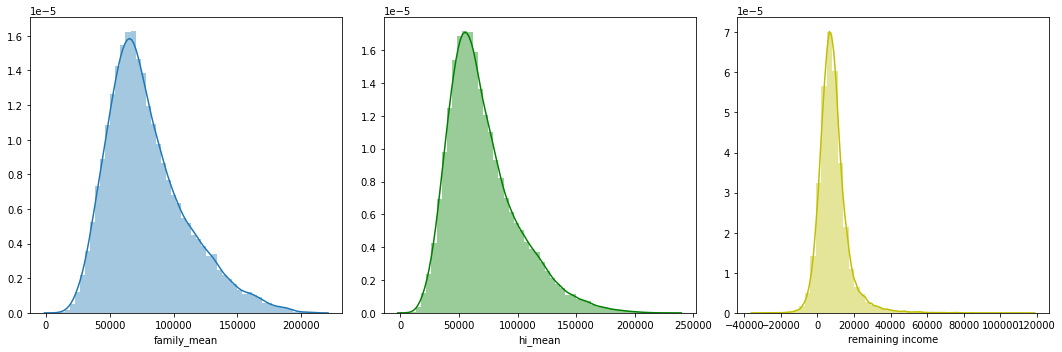

In [34]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.distplot(train.family_mean)
plt.subplot(1, 3, 2)
sns.distplot(train.hi_mean, color='g')
plt.subplot(1, 3, 3)
sns.distplot(train.family_mean - train.hi_mean, color='y')
plt.xlabel('remaining income')
plt.tight_layout()
plt.show()

## Step 5.	Perform EDA and come out with insights into population density and age. You may require deriving new fields (Make sure to weight averages for accurate measurements): 

•	Population density (hint-use ‘pop’ and ‘Aland’ to calculate)

•	median age (hint-use the variables ‘male_age_median’, ‘female_age_median’, ‘male_pop’, ‘female_pop’)
Visualize the findings using appropriate chart type.


### Population Density

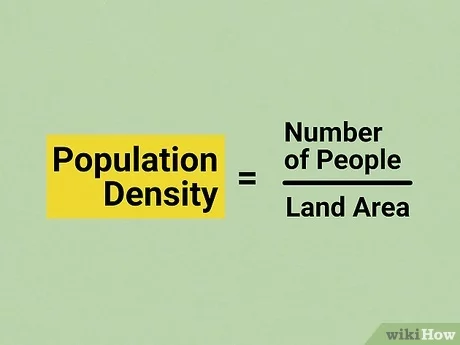

In [35]:
train['Population_Density'] = train['pop'] / train['ALand']

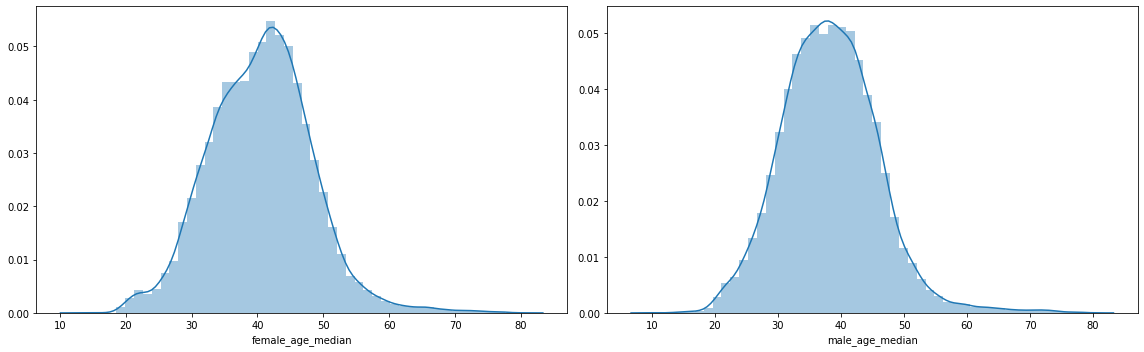

In [36]:
plt.figure(figsize=(16, 5))
plt.subplot(1, 2, 1)
sns.distplot(train.female_age_median)
plt.subplot(1, 2, 2)
sns.distplot(train.male_age_median)
plt.tight_layout()


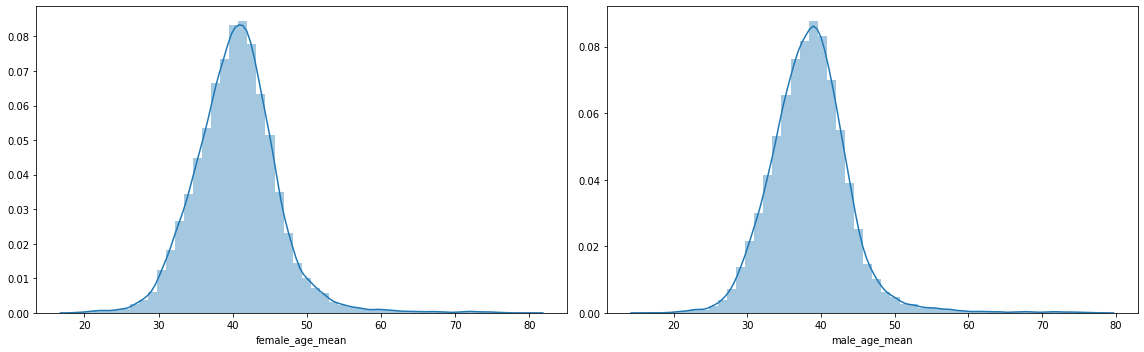

In [37]:
plt.figure(figsize=(16, 5))
plt.subplot(1, 2, 1)
sns.distplot(train.female_age_mean)
plt.subplot(1, 2, 2)
sns.distplot(train.male_age_mean)
plt.tight_layout()


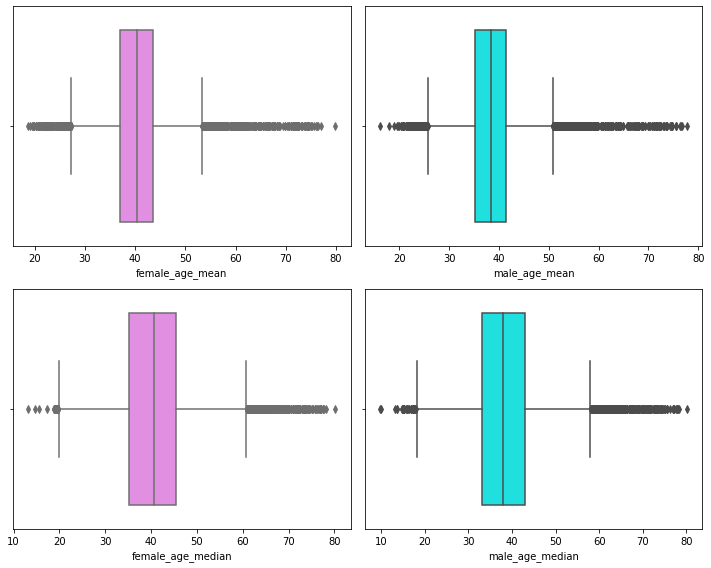

In [38]:
plt.figure(figsize=(10, 8))
plt.subplot(2, 2, 1)
sns.boxplot(train.female_age_mean, color='violet')
plt.subplot(2, 2, 2)
sns.boxplot(train.male_age_mean, color='cyan')
plt.subplot(2, 2, 3)
sns.boxplot(train.female_age_median, color='violet')
plt.subplot(2, 2, 4)
sns.boxplot(train.male_age_median, color='cyan')
plt.tight_layout()



<AxesSubplot:xlabel='Population_Density'>

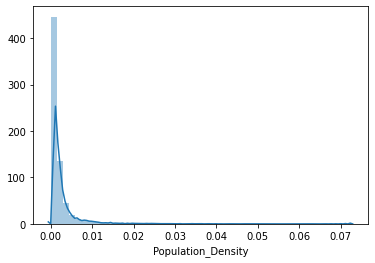

In [39]:
sns.distplot(train.Population_Density)

In [40]:
(train.Population_Density * 100).describe()

count    26585.000000
mean         0.197994
std          0.422326
min          0.000001
25%          0.012538
50%          0.085775
75%          0.204271
max          7.228254
Name: Population_Density, dtype: float64

## Step 6.	Create bins for population into a new variable by selecting appropriate class interval so that the no of categories(bins) don’t exceed 5 for the ease of analysis. Analyze the married, separated and divorced population for these population brackets. Visualize using appropriate chart type.

Age groups:

Youth (<18)

Young Adult (18 to 35)

Adult (36 to 55)


Senior (56 and up)

In [41]:
bins=[0, 18, 35, 55, 100]
labels=['kids', 'young_adults', 'adults', 'seniors']
train['agegroup_male'] = pd.cut(train.male_age_mean, bins=bins, labels=labels)
train['agegroup_female'] = pd.cut(train.female_age_mean, bins=bins, labels=labels)

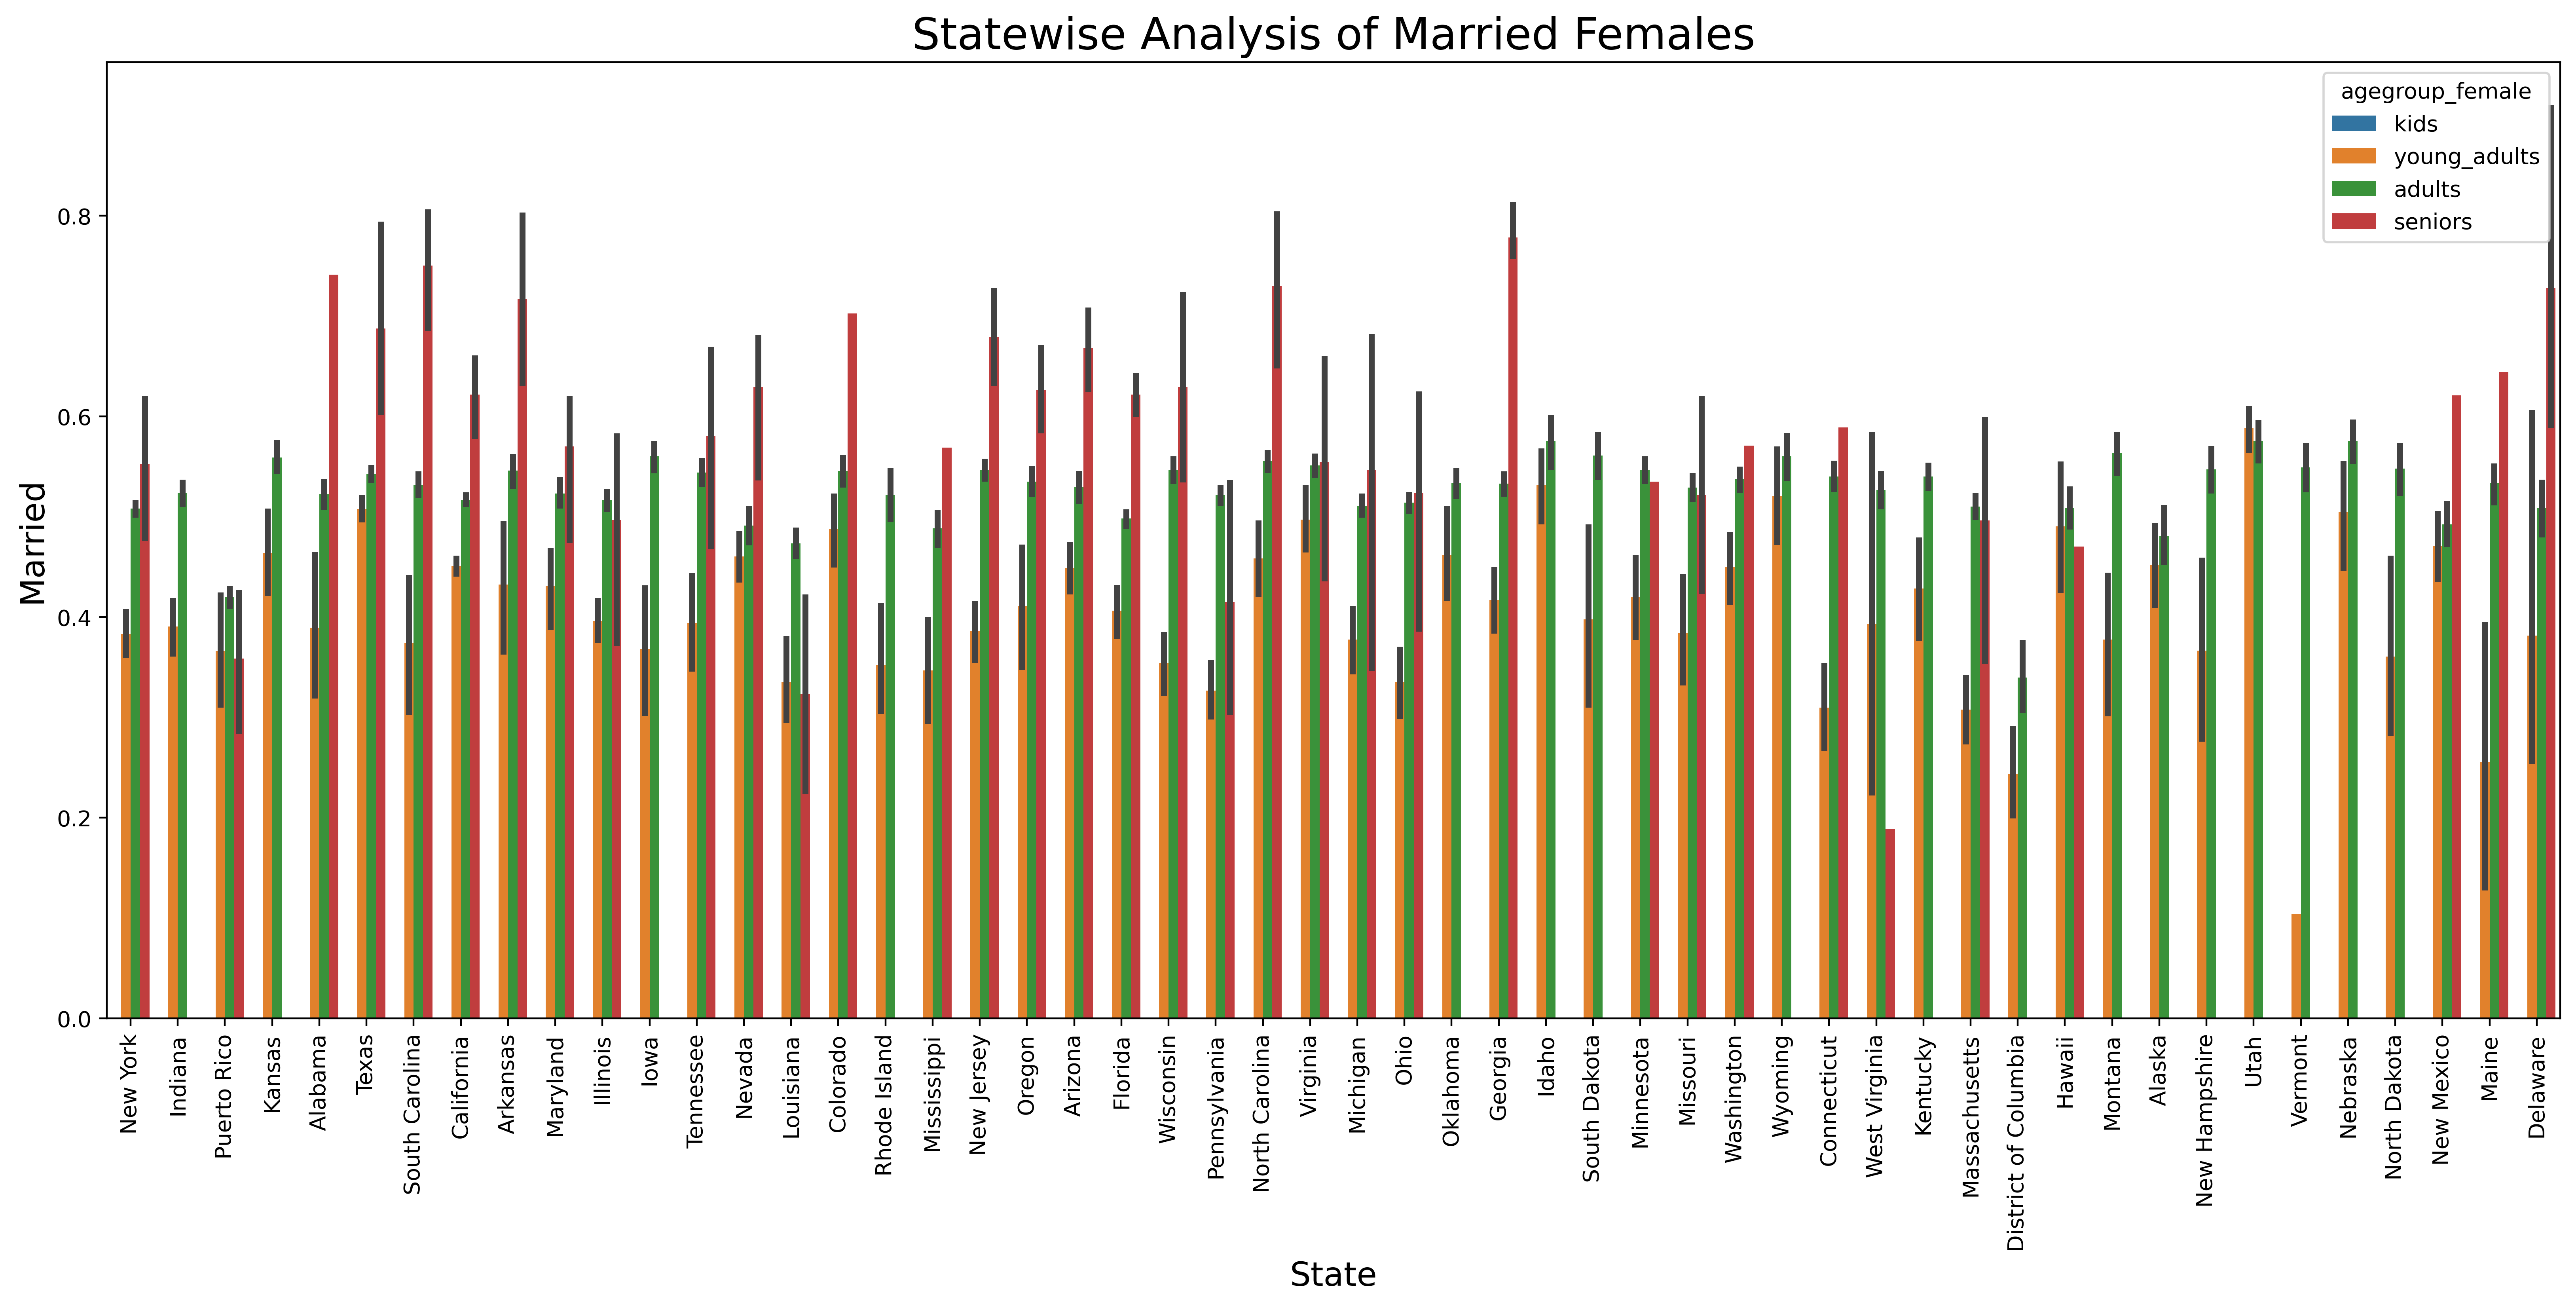

In [42]:
plt.figure(figsize=(20, 8), dpi=400)
sns.barplot(x=train.state, y=train.married, hue=train.agegroup_female)
plt.tick_params('x', labelrotation=90)
plt.title('Statewise Analysis of Married Females',
          fontdict={
              'fontsize':20
          })
plt.ylabel('Married', 
           fontdict={
               'fontsize':15
           })
plt.xlabel('State', 
           fontdict={
               'fontsize':15
           })
plt.savefig('../Plots/StateMarriedFemales.png')
plt.show()

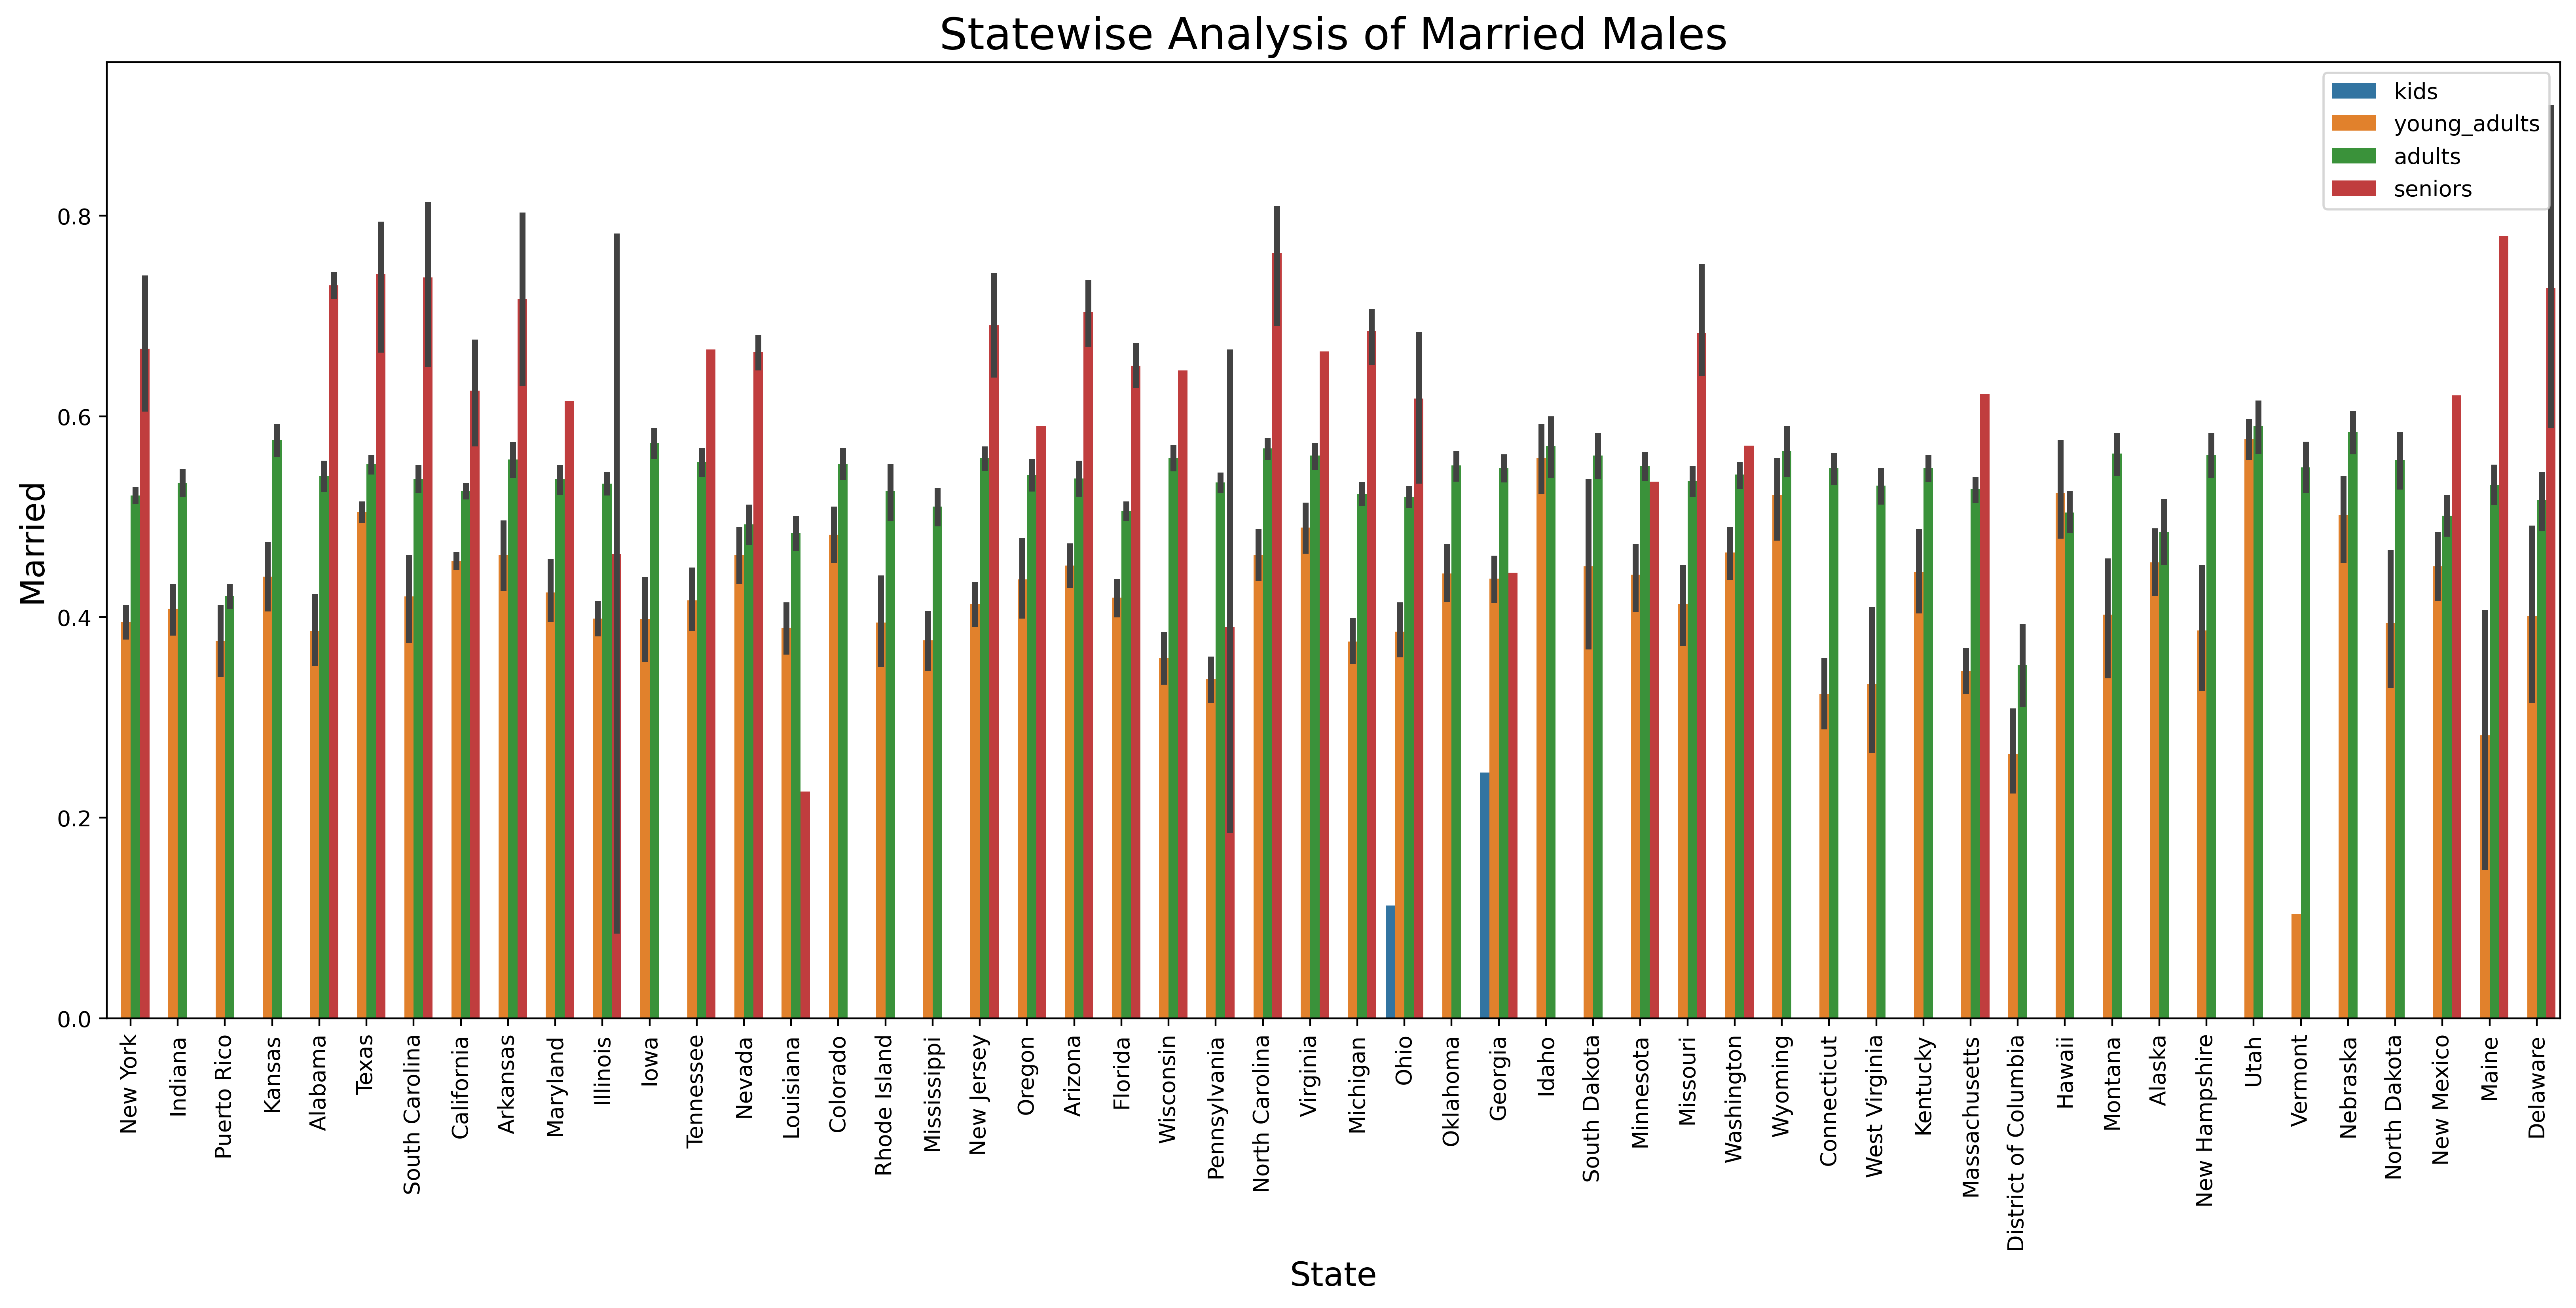

In [43]:
plt.figure(figsize=(20, 8),dpi=400)
sns.barplot(x=train.state, y=train.married, hue=train.agegroup_male)
plt.tick_params('x', labelrotation=90)
plt.title('Statewise Analysis of Married Males',
          fontdict={
              'fontsize':20
          })
plt.ylabel('Married', 
           fontdict={
               'fontsize':15
           })
plt.xlabel('State', 
           fontdict={
               'fontsize':15
           })
plt.legend(loc='upper right')
plt.savefig('../Plots/StateMarriedMales.png')
plt.show()

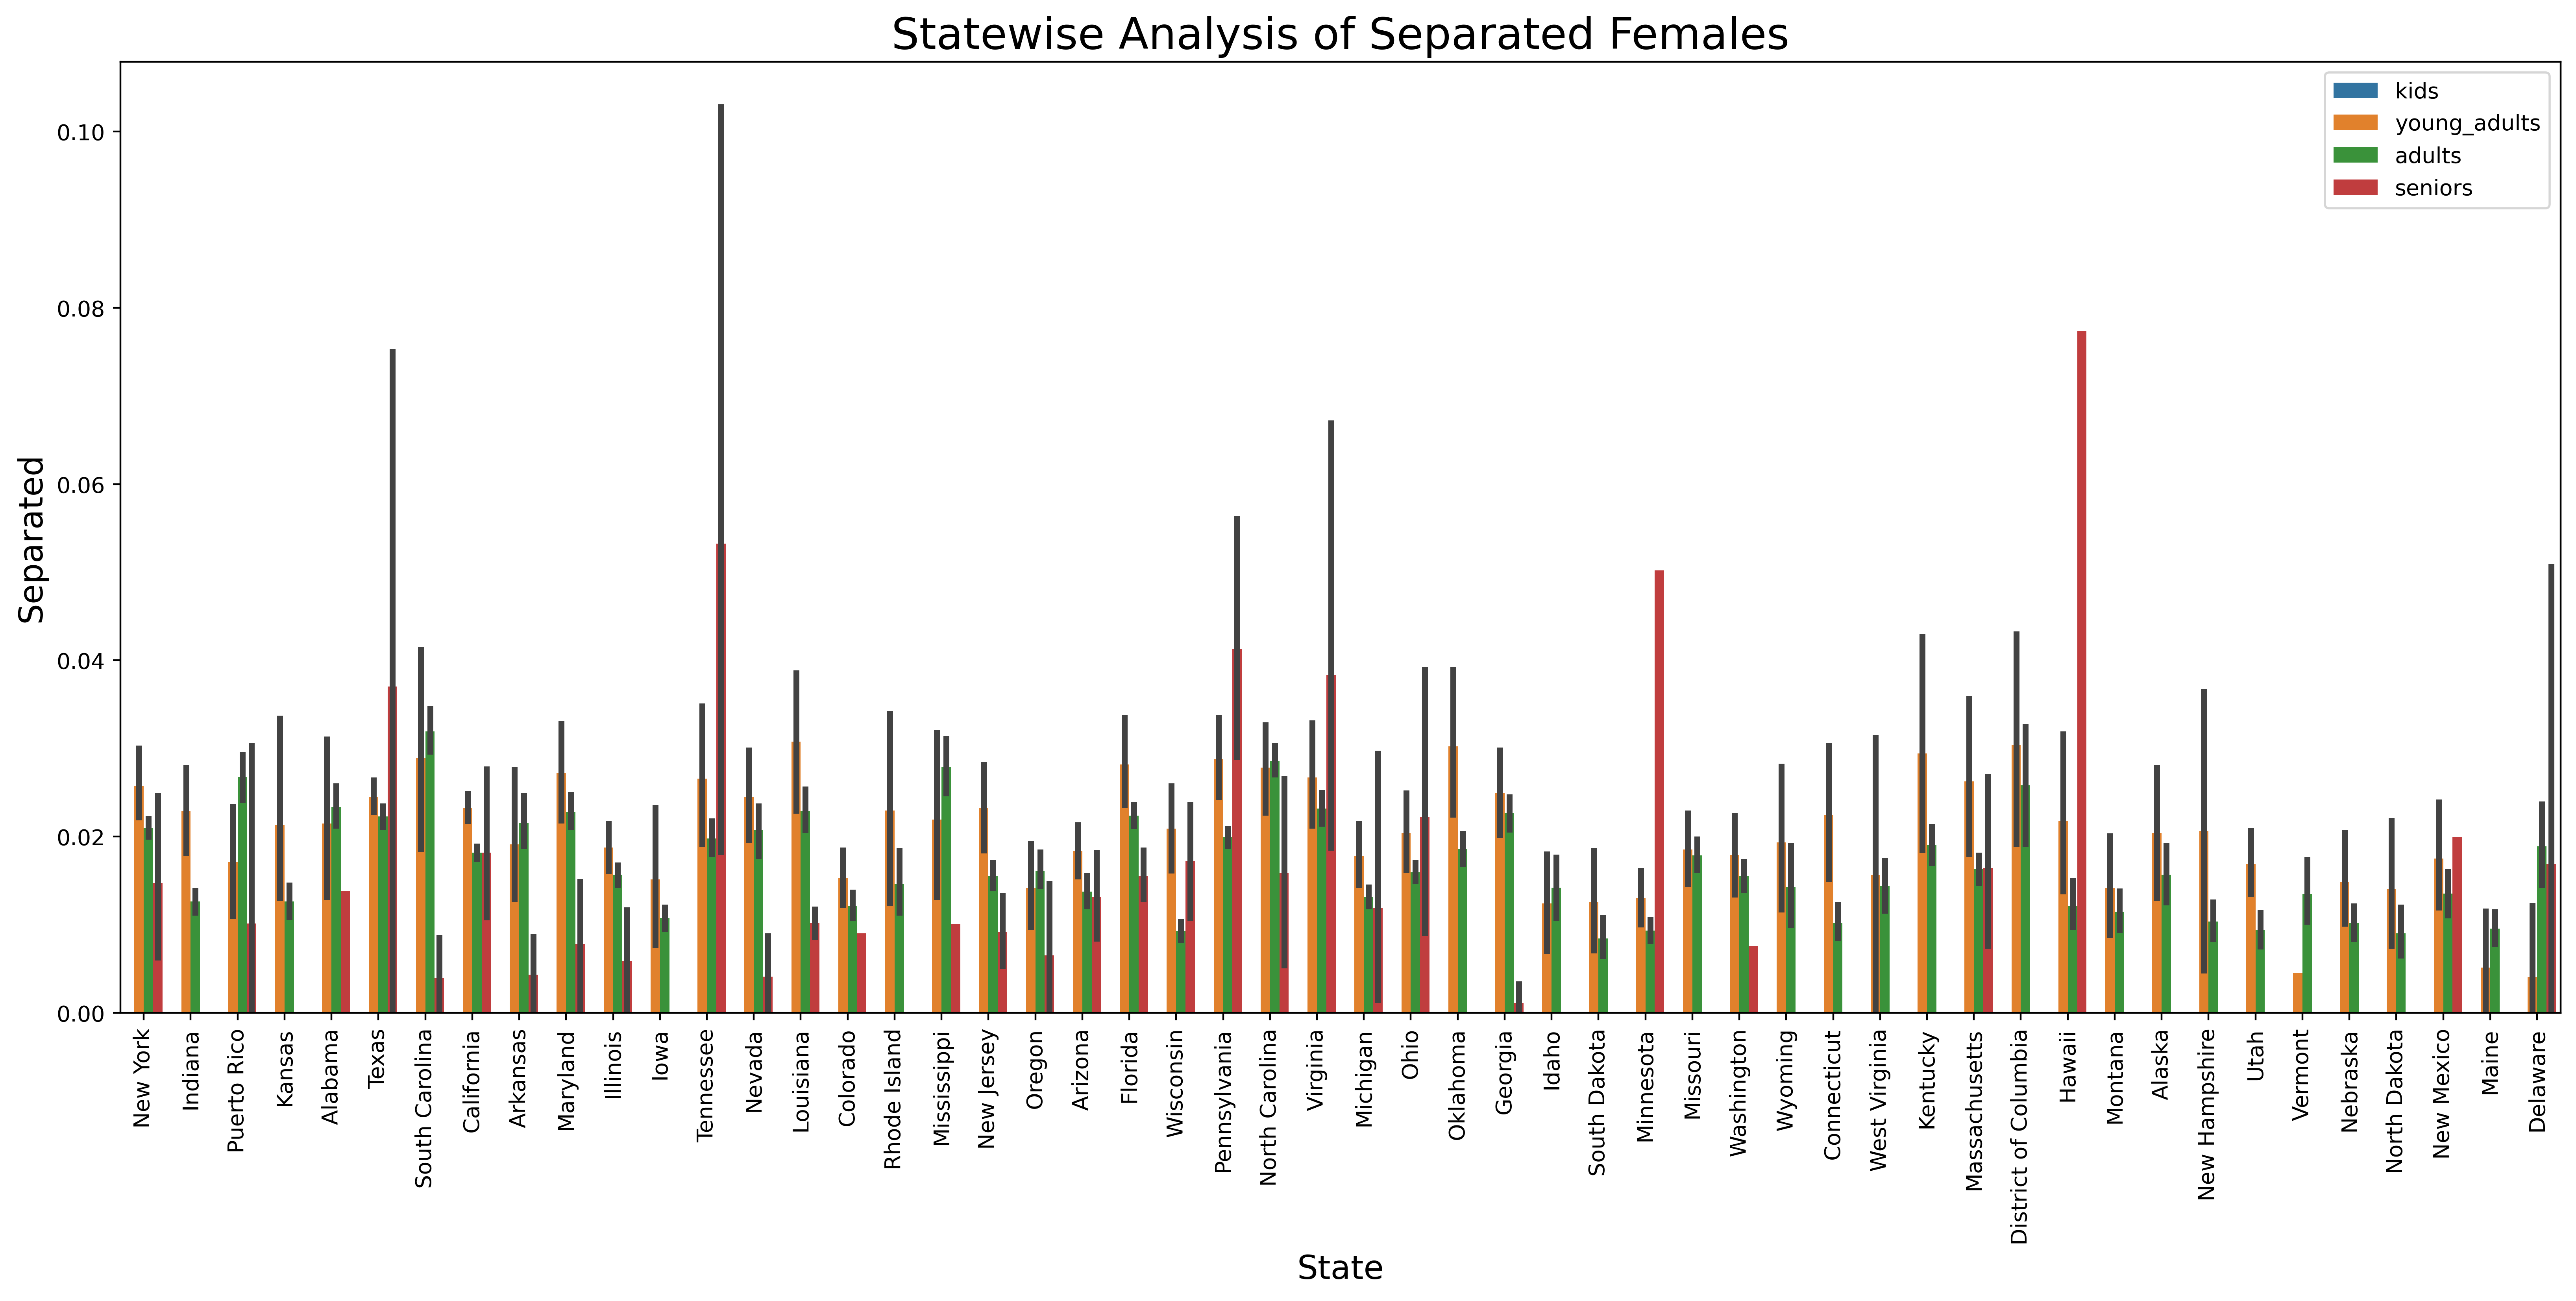

In [44]:
plt.figure(figsize=(20, 8), dpi=400)
sns.barplot(x=train.state, y=train.separated, hue=train.agegroup_female)
plt.tick_params('x', labelrotation=90)
plt.title('Statewise Analysis of Separated Females',
          fontdict={
              'fontsize':20
          })
plt.ylabel('Separated', 
           fontdict={
               'fontsize':15
           })
plt.xlabel('State', 
           fontdict={
               'fontsize':15
           })
plt.legend(loc='upper right')
plt.savefig('../Plots/StateSeparatedFemales.png')
plt.show()

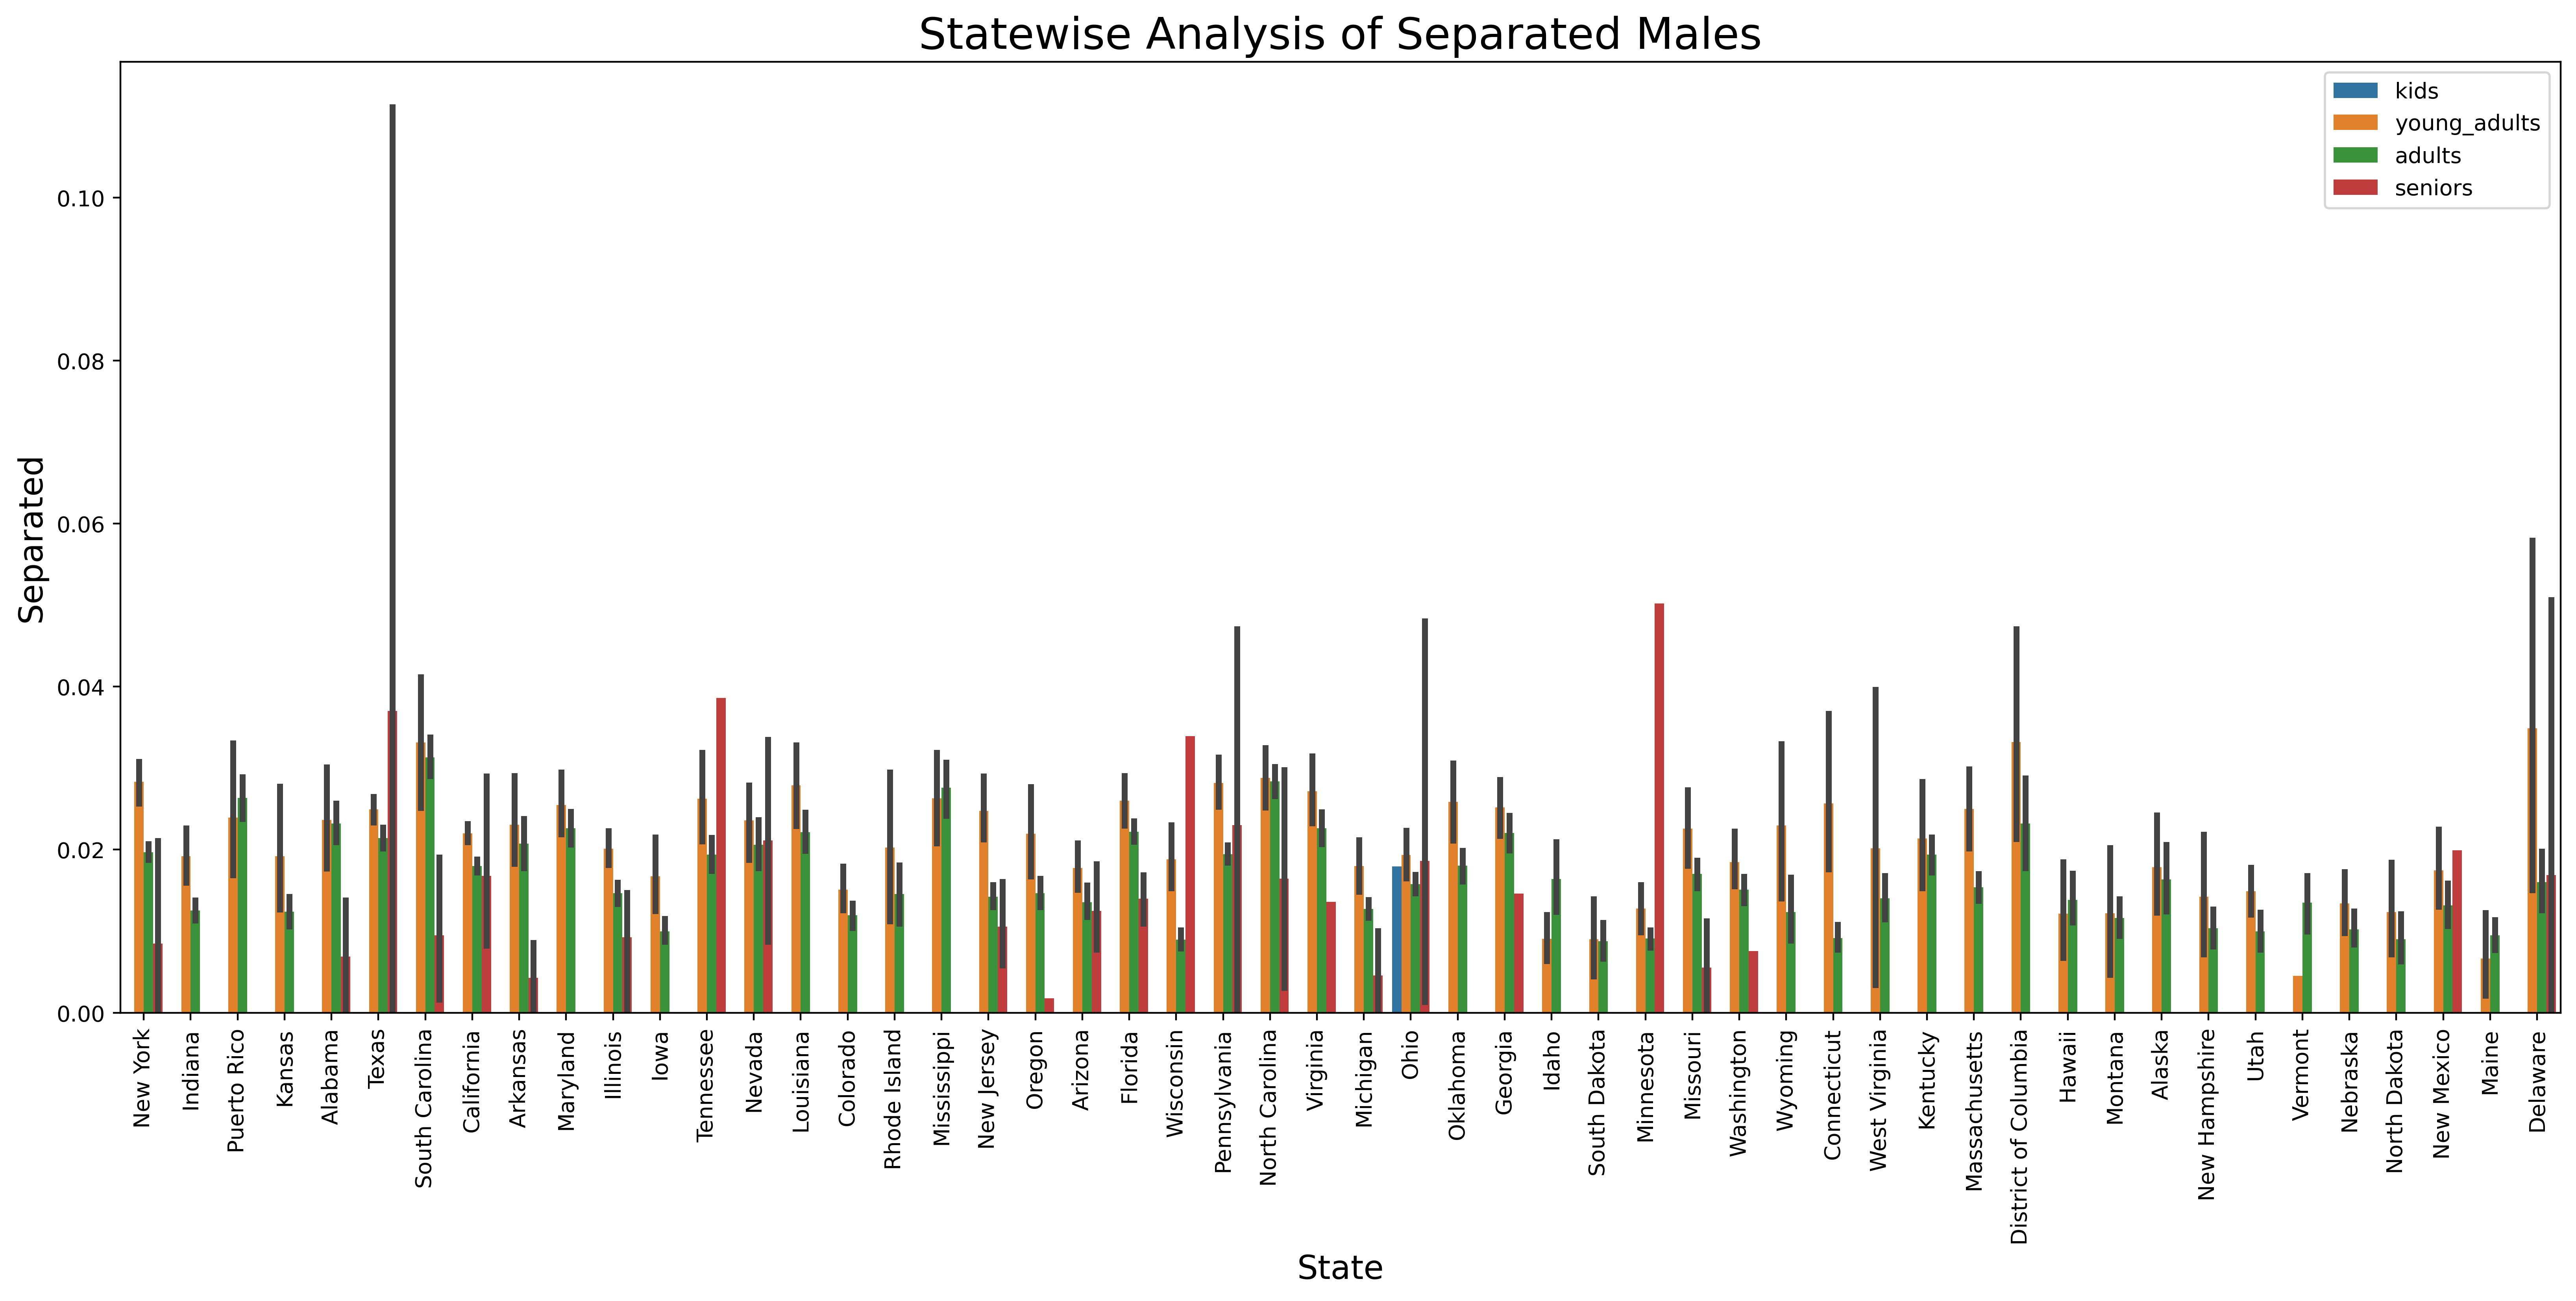

In [45]:
plt.figure(figsize=(20, 8), dpi=400)
sns.barplot(x=train.state, y=train.separated, hue=train.agegroup_male)
plt.tick_params('x', labelrotation=90)
plt.title('Statewise Analysis of Separated Males',
          fontdict={
              'fontsize':20
          })
plt.ylabel('Separated', 
           fontdict={
               'fontsize':15
           })
plt.xlabel('State', 
           fontdict={
               'fontsize':15
           })
plt.legend(loc='upper right')
plt.savefig('../Plots/StateSeparatedMales.png')
plt.show()

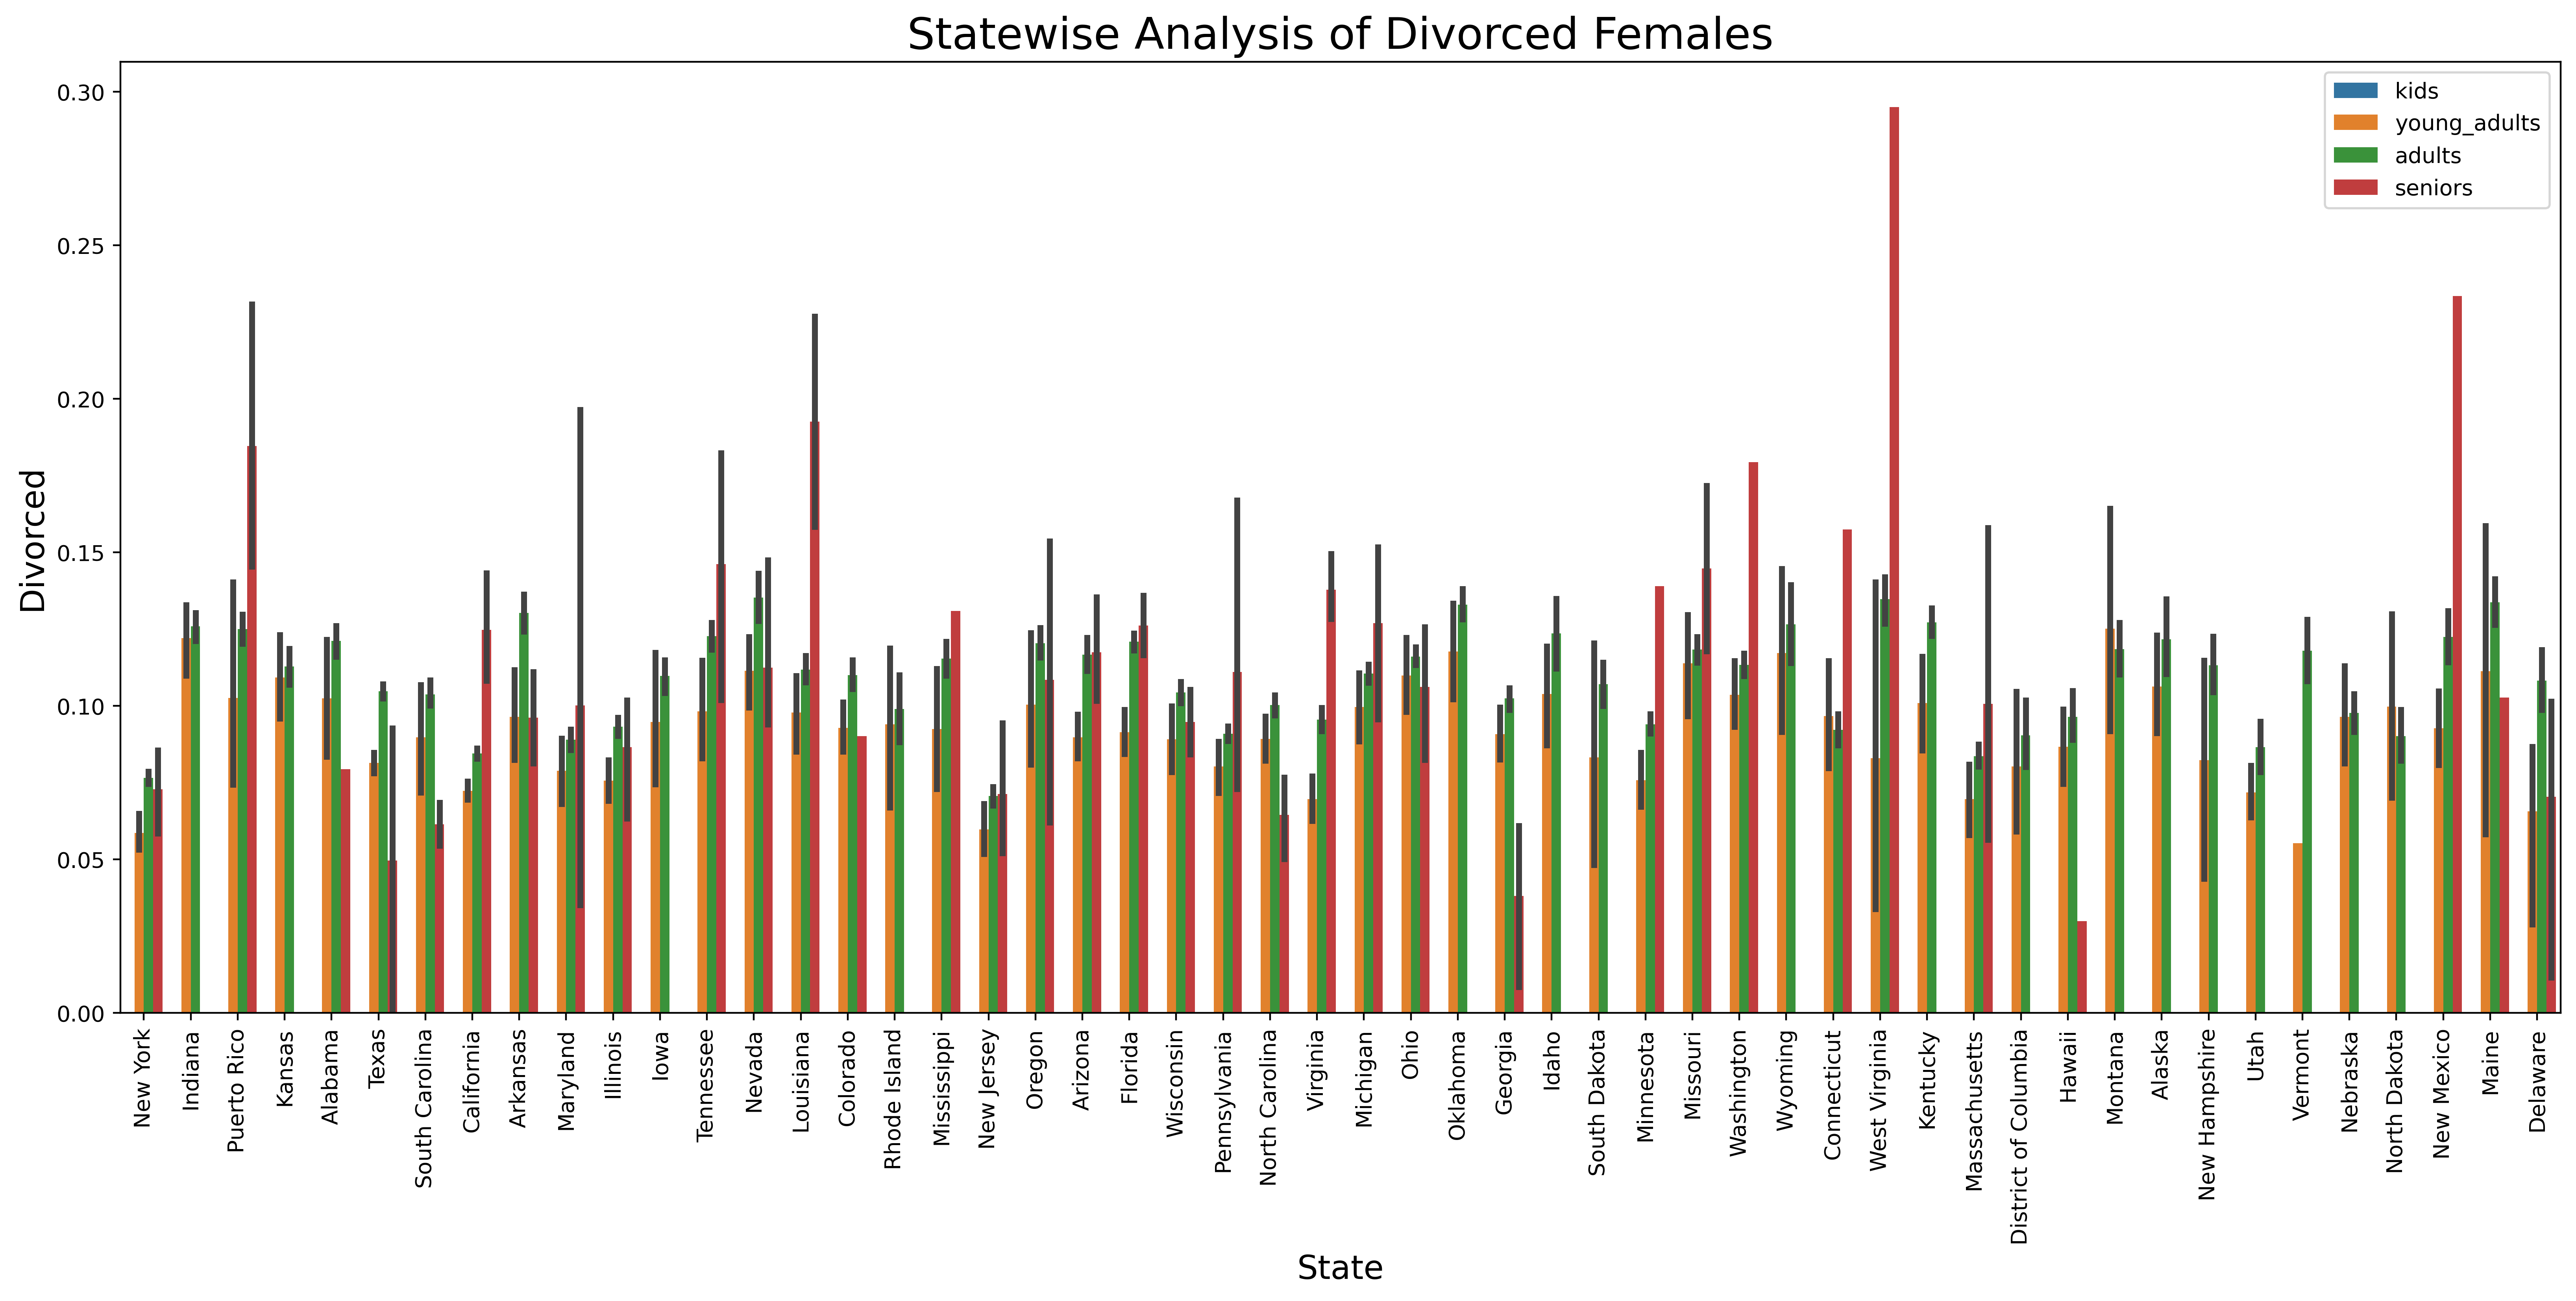

In [46]:
plt.figure(figsize=(20, 8), dpi=400)
sns.barplot(x=train.state, y=train.divorced, hue=train.agegroup_female)
plt.tick_params('x', labelrotation=90)
plt.title('Statewise Analysis of Divorced Females',
          fontdict={
              'fontsize':20
          })
plt.ylabel('Divorced', 
           fontdict={
               'fontsize':15
           })
plt.xlabel('State', 
           fontdict={
               'fontsize':15
           })
plt.legend(loc='upper right')
plt.savefig('../Plots/StateDivorcedFemales.png')
plt.show()

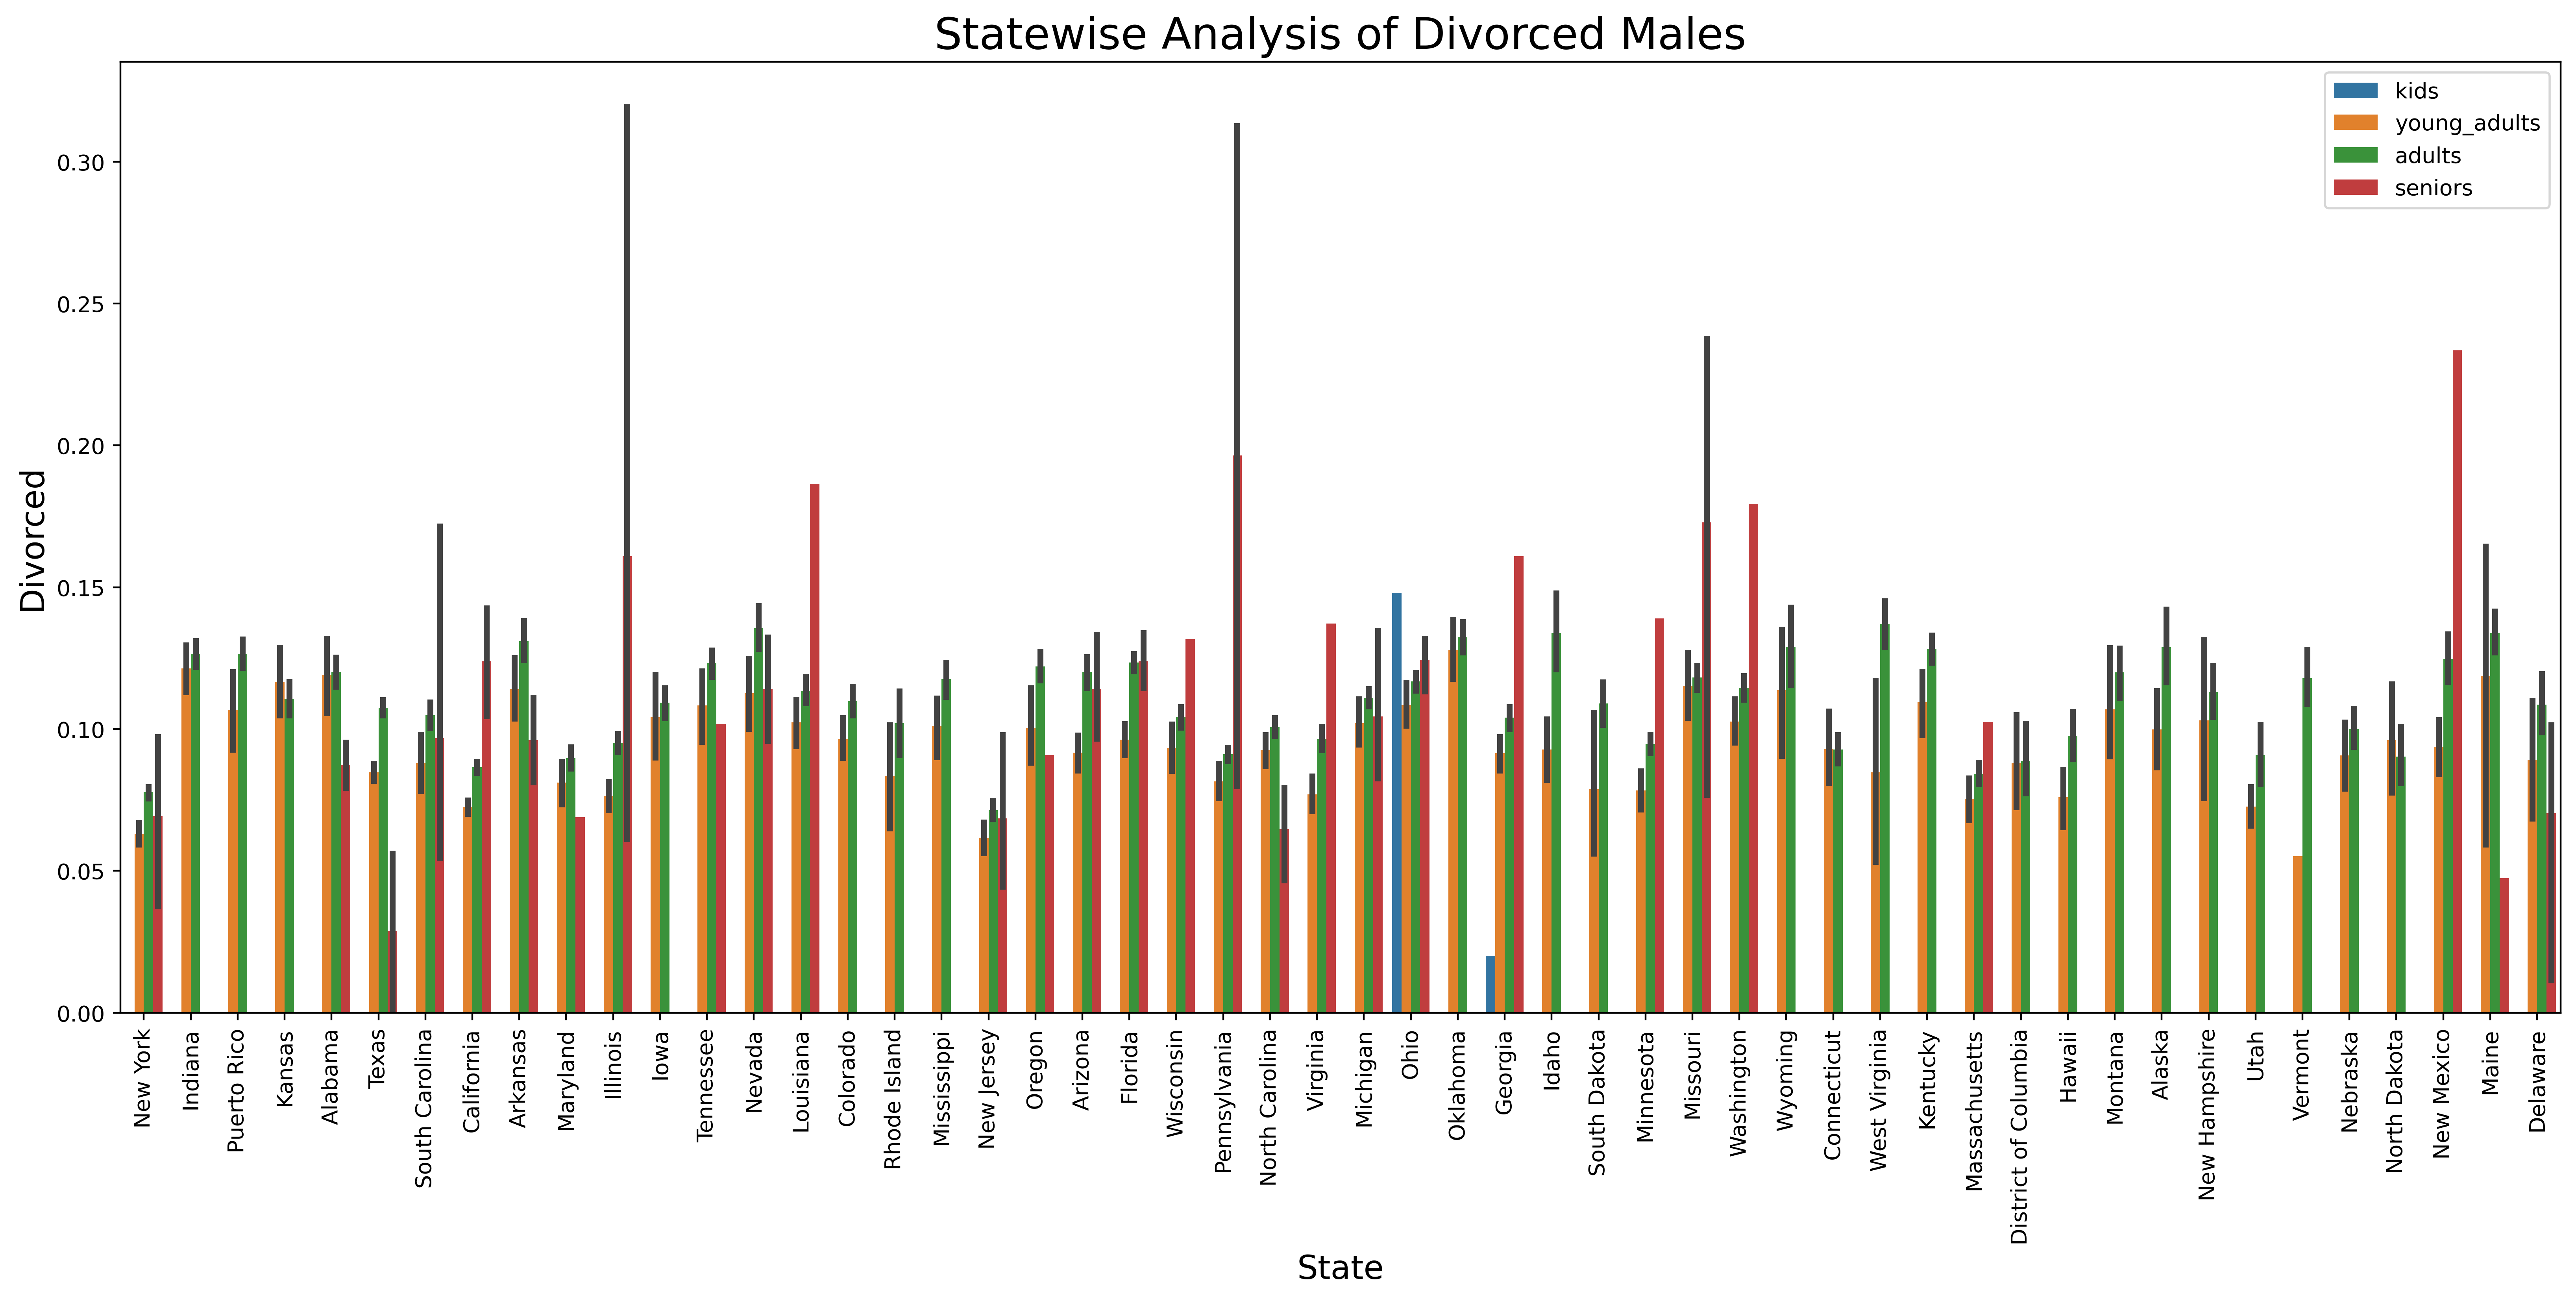

In [47]:
plt.figure(figsize=(20, 8), dpi=400)
sns.barplot(x=train.state, y=train.divorced, hue=train.agegroup_male)
plt.tick_params('x', labelrotation=90)
plt.title('Statewise Analysis of Divorced Males',
          fontdict={
              'fontsize':20
          })
plt.ylabel('Divorced', 
           fontdict={
               'fontsize':15
           })
plt.xlabel('State', 
           fontdict={
               'fontsize':15
           })
plt.legend(loc='upper right')
plt.savefig('../Plots/StateDivorcedMales.png')
plt.show()

## Step 7.	Please detail your observations for rent as a percentage of income at an overall level and for different states.

In [48]:
# P(rent > (10% of income))
train['rent_gt_10']

UID
267822    0.86761
246444    0.97410
245683    0.95238
279653    0.94693
247218    0.99286
           ...   
279212    1.00000
277856    0.85435
233000    0.93846
287425    1.00000
265371    0.94956
Name: rent_gt_10, Length: 26585, dtype: float64

In [49]:
cols = ['rent_gt_10','rent_gt_15','rent_gt_20','rent_gt_25','rent_gt_30','rent_gt_35','rent_gt_40','rent_gt_50']

In [50]:
train[cols]

rent_gt_10  rent_gt_15  rent_gt_20  rent_gt_25  rent_gt_30  \
UID                                                                  
267822     0.86761     0.79155     0.59155     0.45634     0.42817   
246444     0.97410     0.93227     0.69920     0.69920     0.55179   
245683     0.95238     0.88624     0.79630     0.66667     0.39153   
279653     0.94693     0.87151     0.69832     0.61732     0.51397   
247218     0.99286     0.98247     0.91688     0.84740     0.78247   
...            ...         ...         ...         ...         ...   
279212     1.00000     1.00000     1.00000     0.83333     0.79012   
277856     0.85435     0.63261     0.50000     0.37391     0.30870   
233000     0.93846     0.71282     0.54359     0.44615     0.29744   
287425     1.00000     1.00000     0.75796     0.61146     0.50318   
265371     0.94956     0.87779     0.83705     0.63337     0.51115   

        rent_gt_35  rent_gt_40  rent_gt_50  
UID                                         
267822     0.18592     0.15493     0.12958  
246444     0.41235     0.39044     0.27888  
245683     0.39153     0.28307     0.15873  
279653     0.46927     0.35754     0.32961  
247218     0.60974     0.55455     0.44416  
...            ...         ...         ...  
279212     0.79012     0.72222     0.62963  
277856     0.30870     0.26304     0.23478  
233000     0.23077     0.16923     0.09231  
287425     0.50318     0.27389     0.27389  
265371     0.41901     0.27934     0.10572  

[26585 rows x 8 columns]

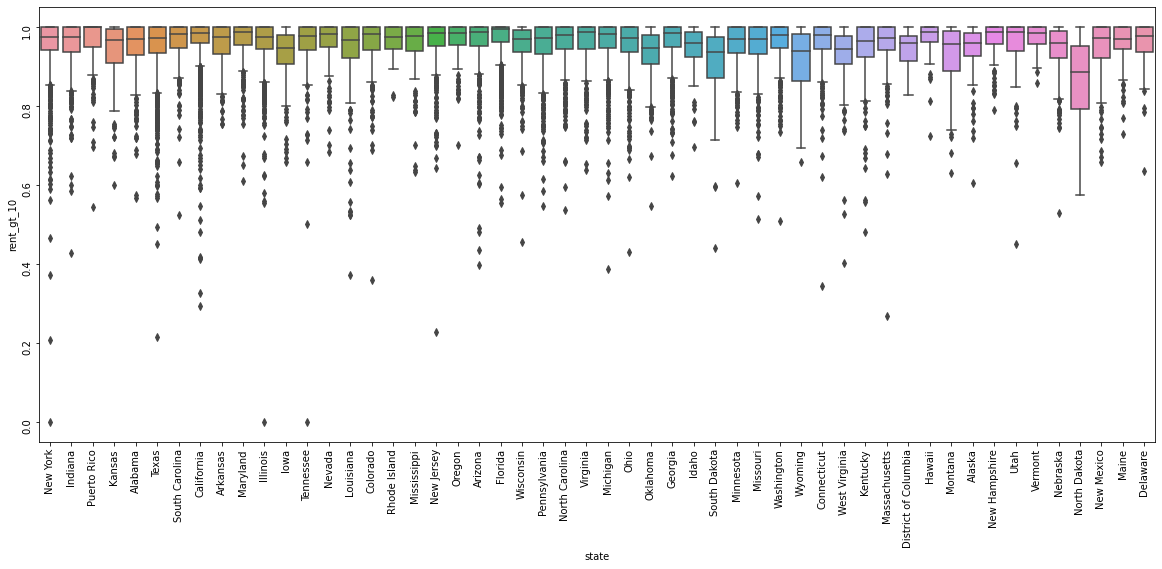

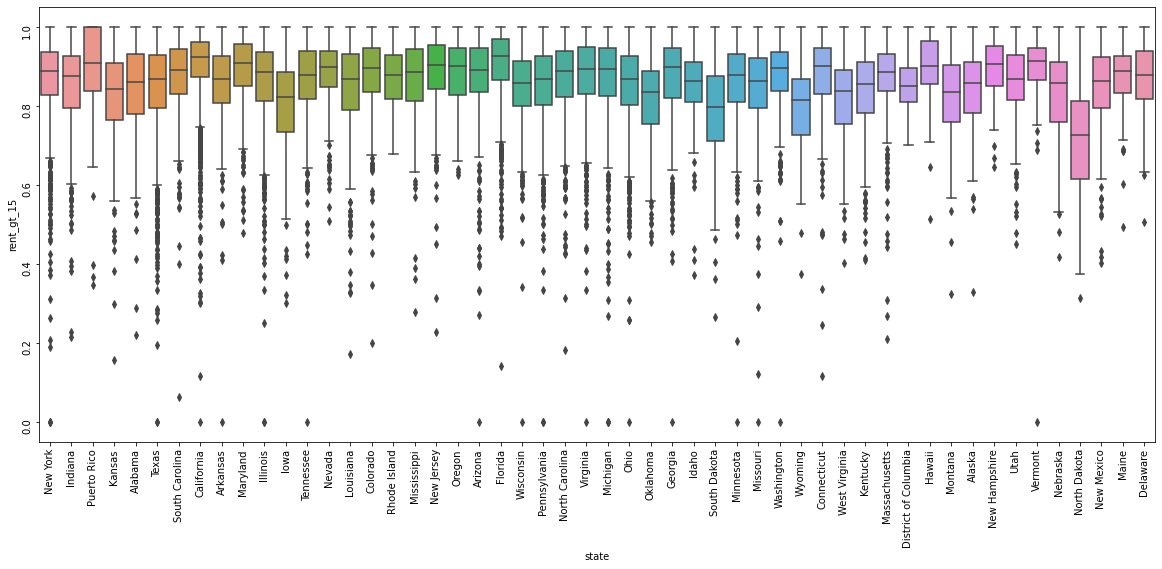

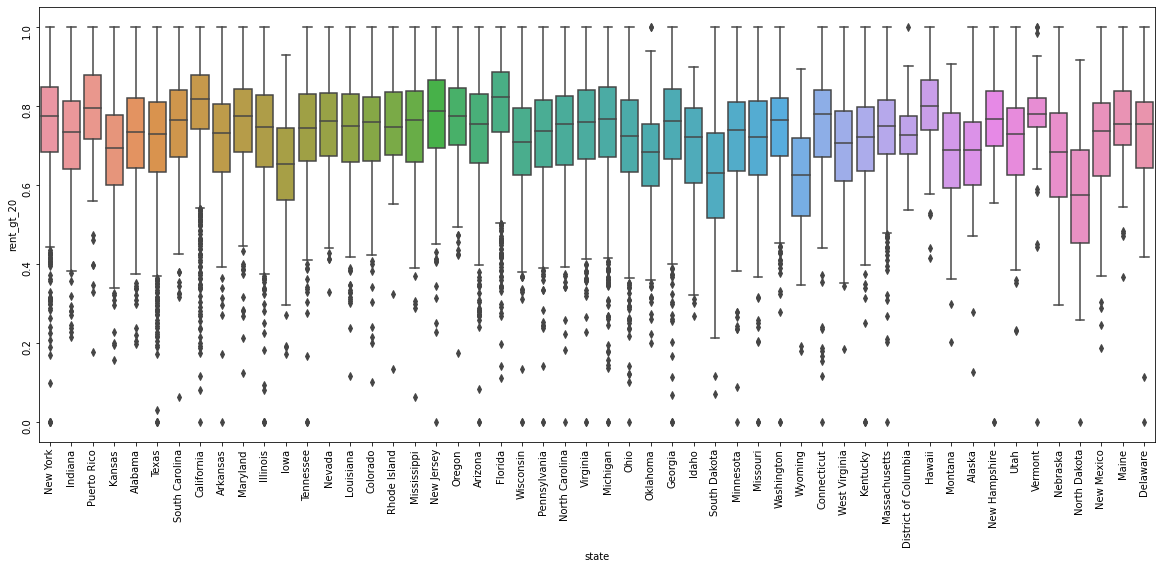

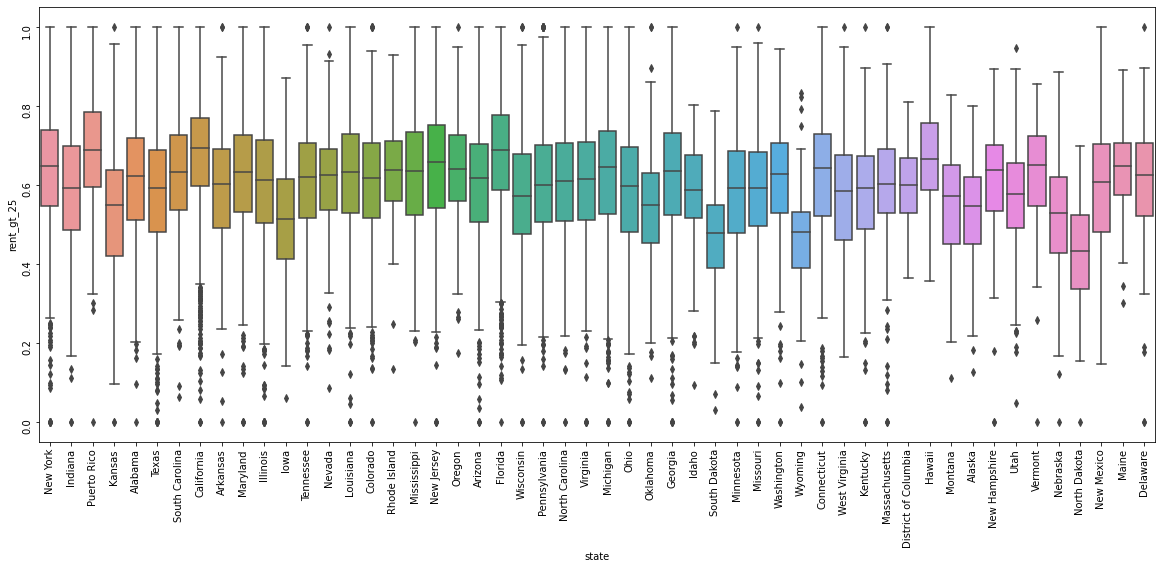

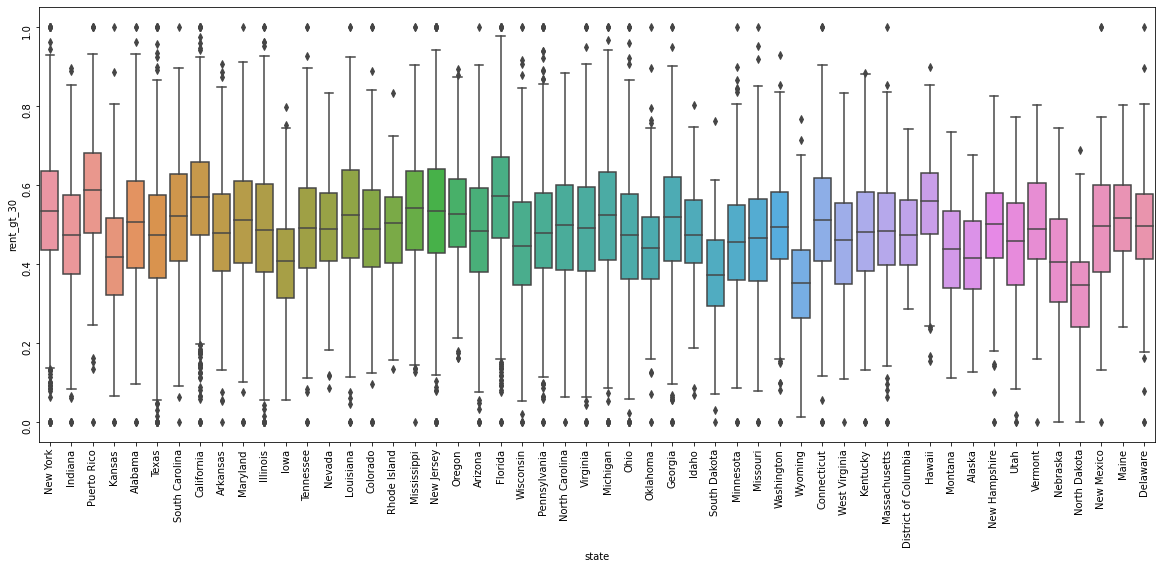

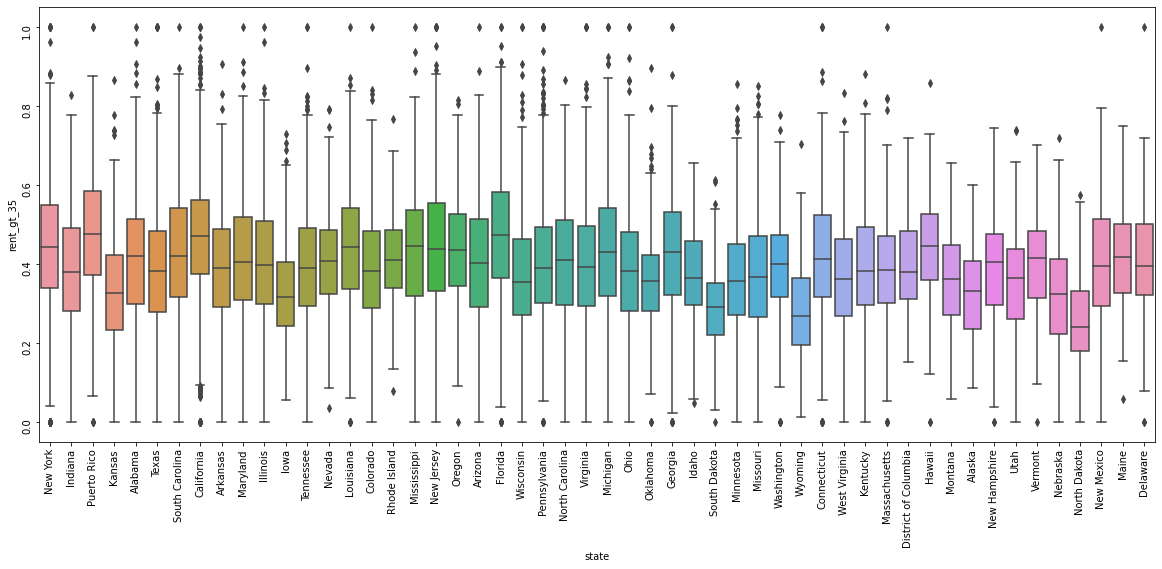

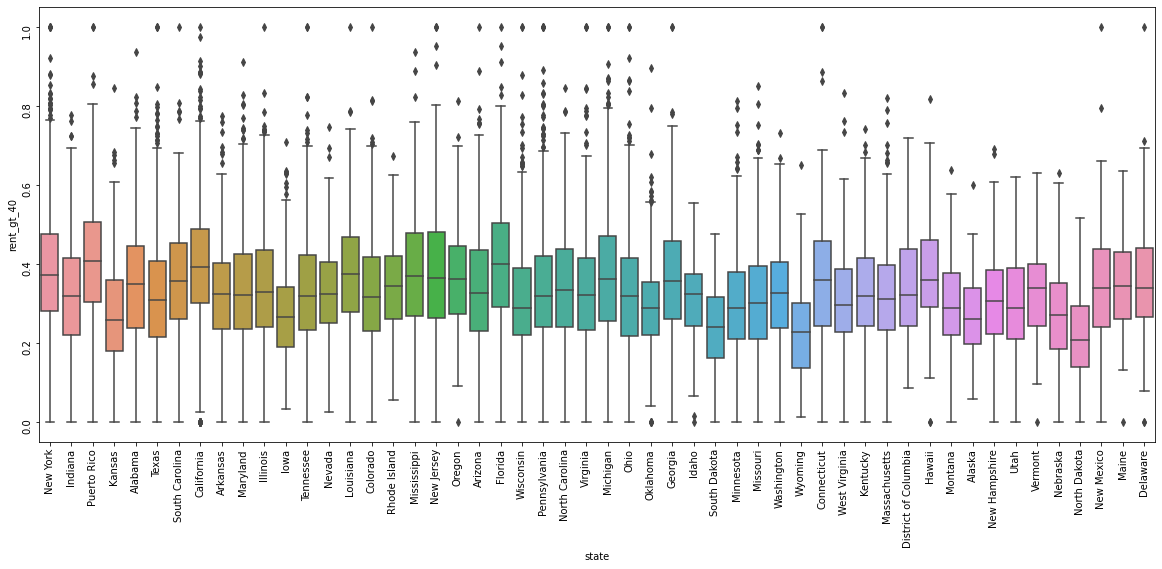

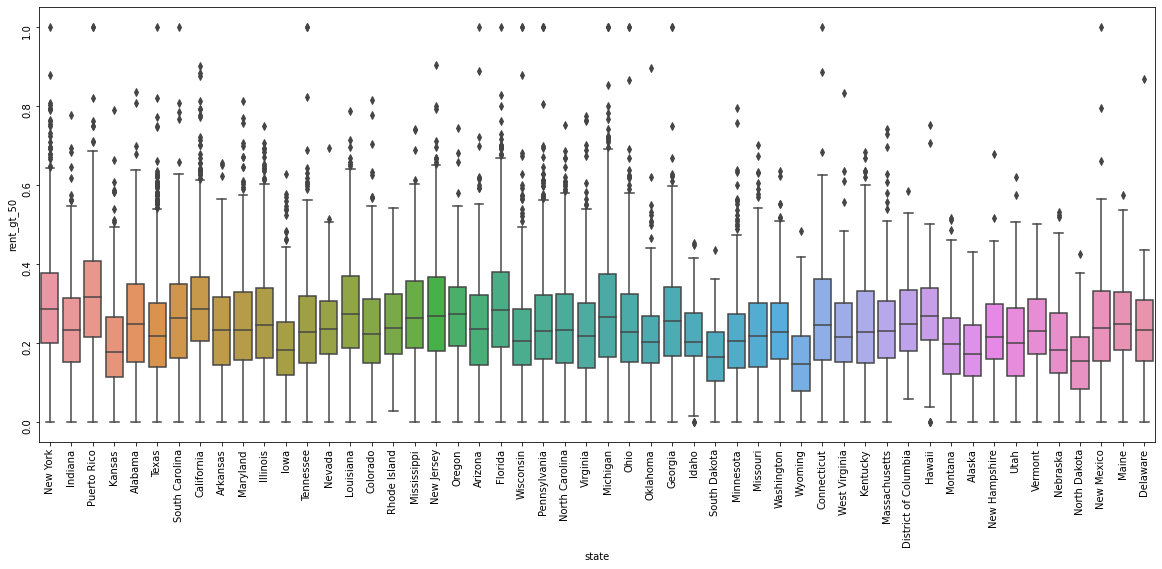

In [51]:
for i in cols:
    plt.figure(figsize=(20, 8))
    sns.boxplot(train['state'], train[i])
    plt.tick_params(labelrotation=90)

## Step 8.	Perform correlation analysis for all the relevant variables by creating a heatmap. Describe your findings. 

In [52]:
corr = train.corr()

In [53]:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

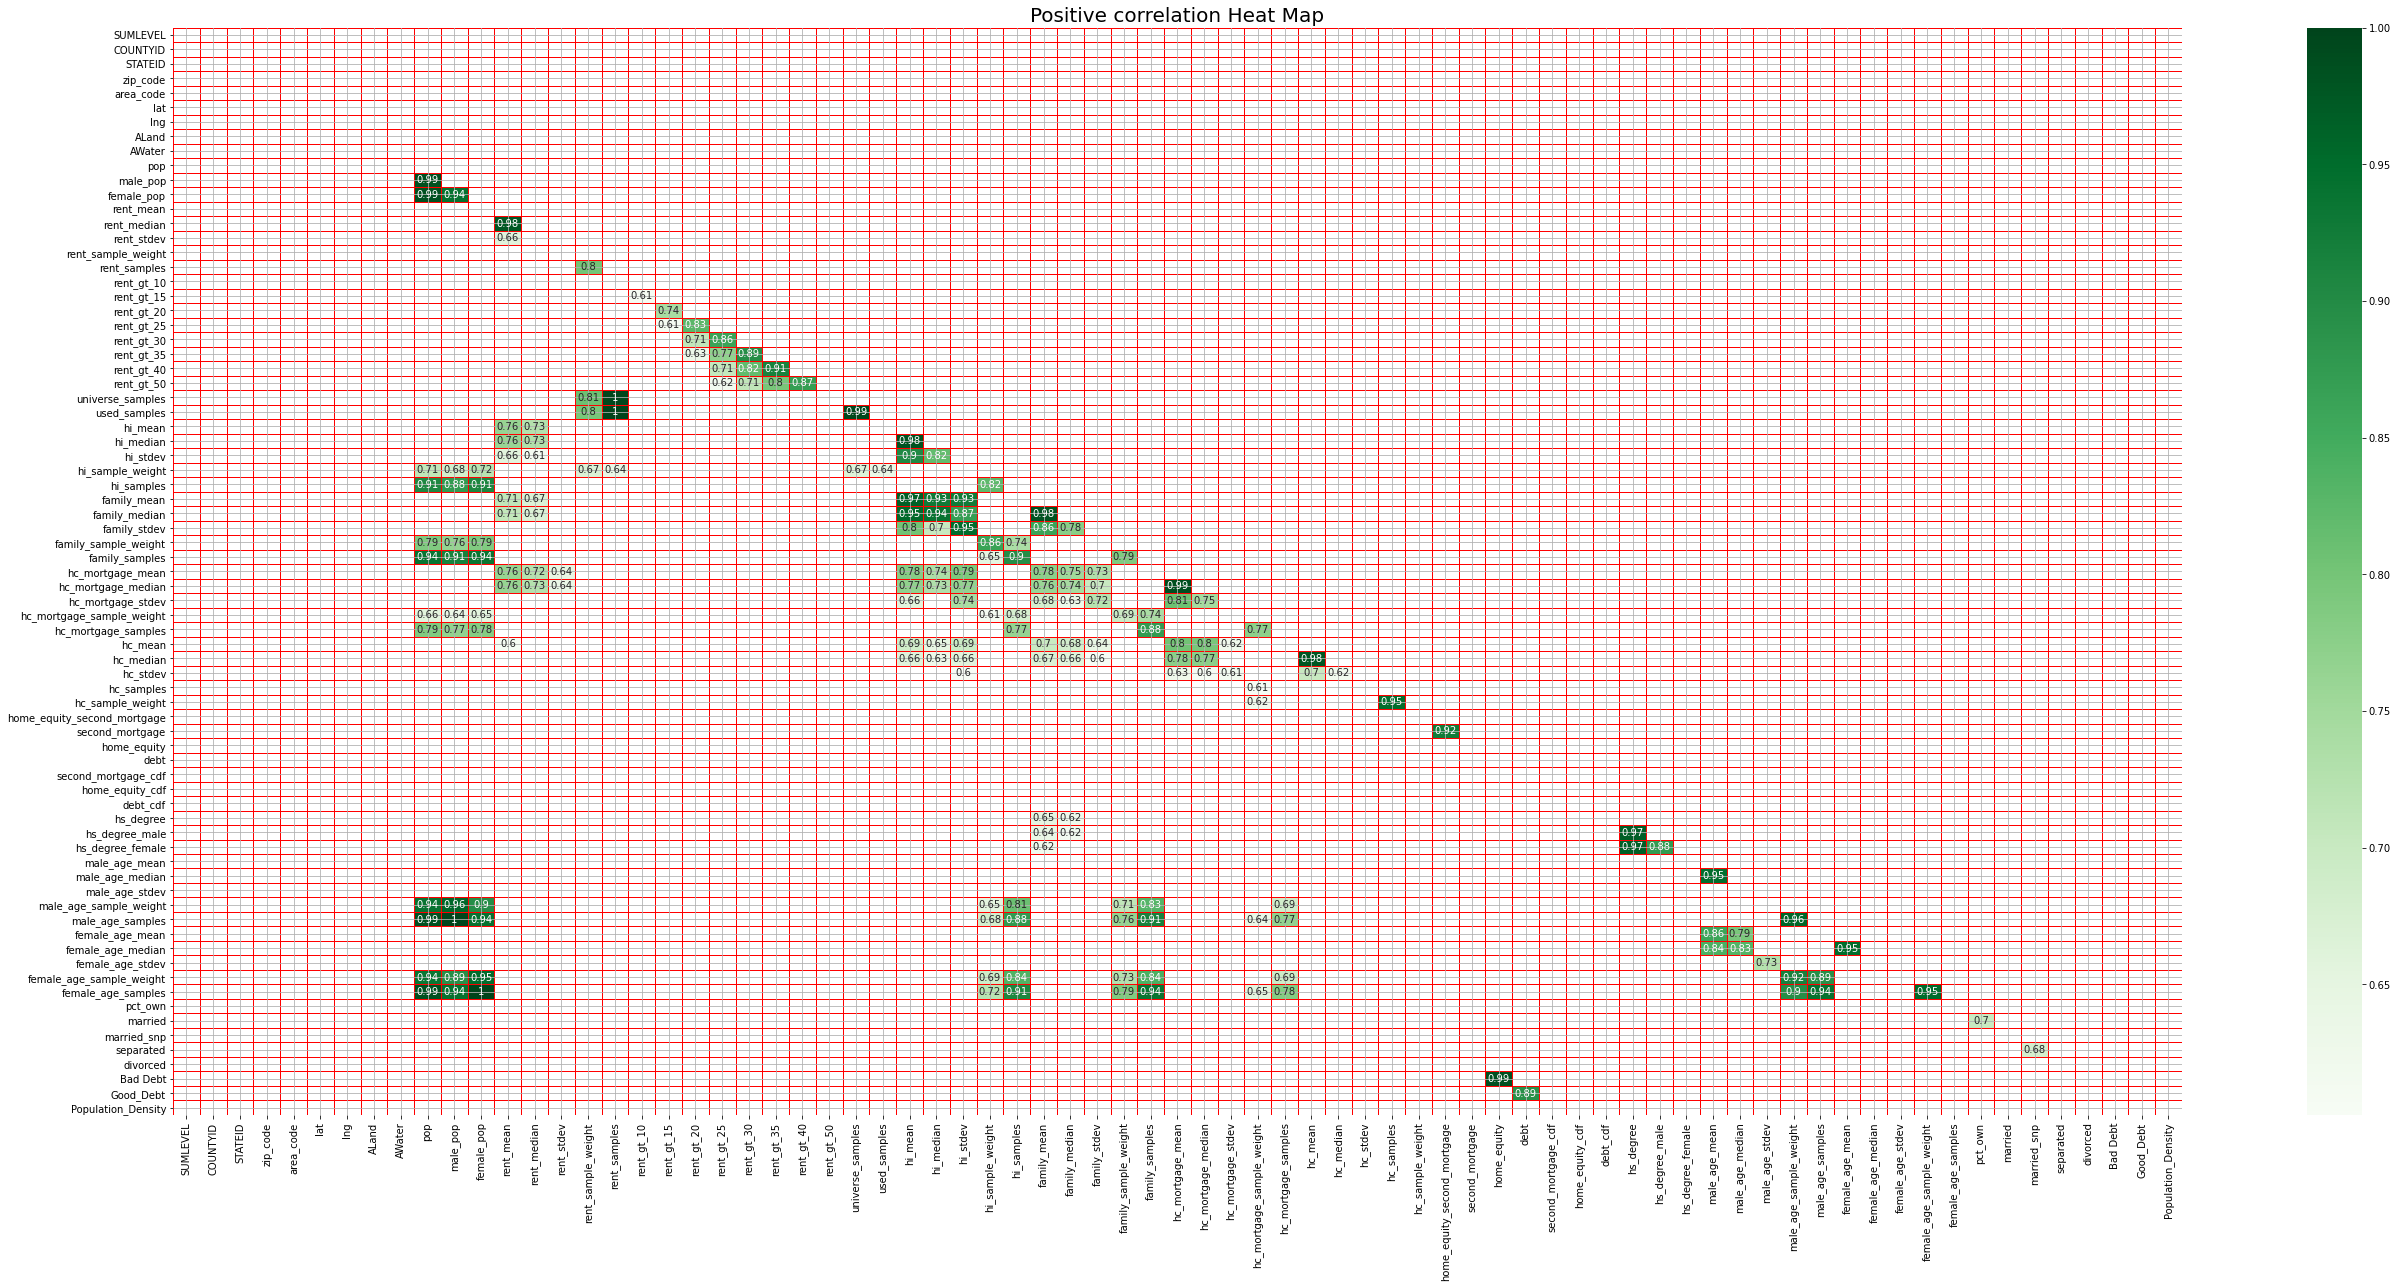

In [54]:
kot = corr[corr >=.6]
plt.figure(figsize=(45,20))
sns.heatmap(kot, cmap="Greens", annot = True, mask = mask, linewidths=1, linecolor='red').set_title('Positive correlation Heat Map', fontsize = 20)
plt.grid('on', )
plt.show()

In [55]:
high_pos_coll_cols = [ 'male_pop', 'female_pop', 'male_age_sample_weight', 'female_age_sample_weight', 
                     'male_age_samples', 'female_age_samples',
                     'hs_degree_male','hs_degree_female', 'universe_samples', 'used_samples', 'rent_median']

In [56]:
train.drop(high_pos_coll_cols,1, inplace=True)

In [59]:
test.drop(high_pos_coll_cols, 1, inplace=True)

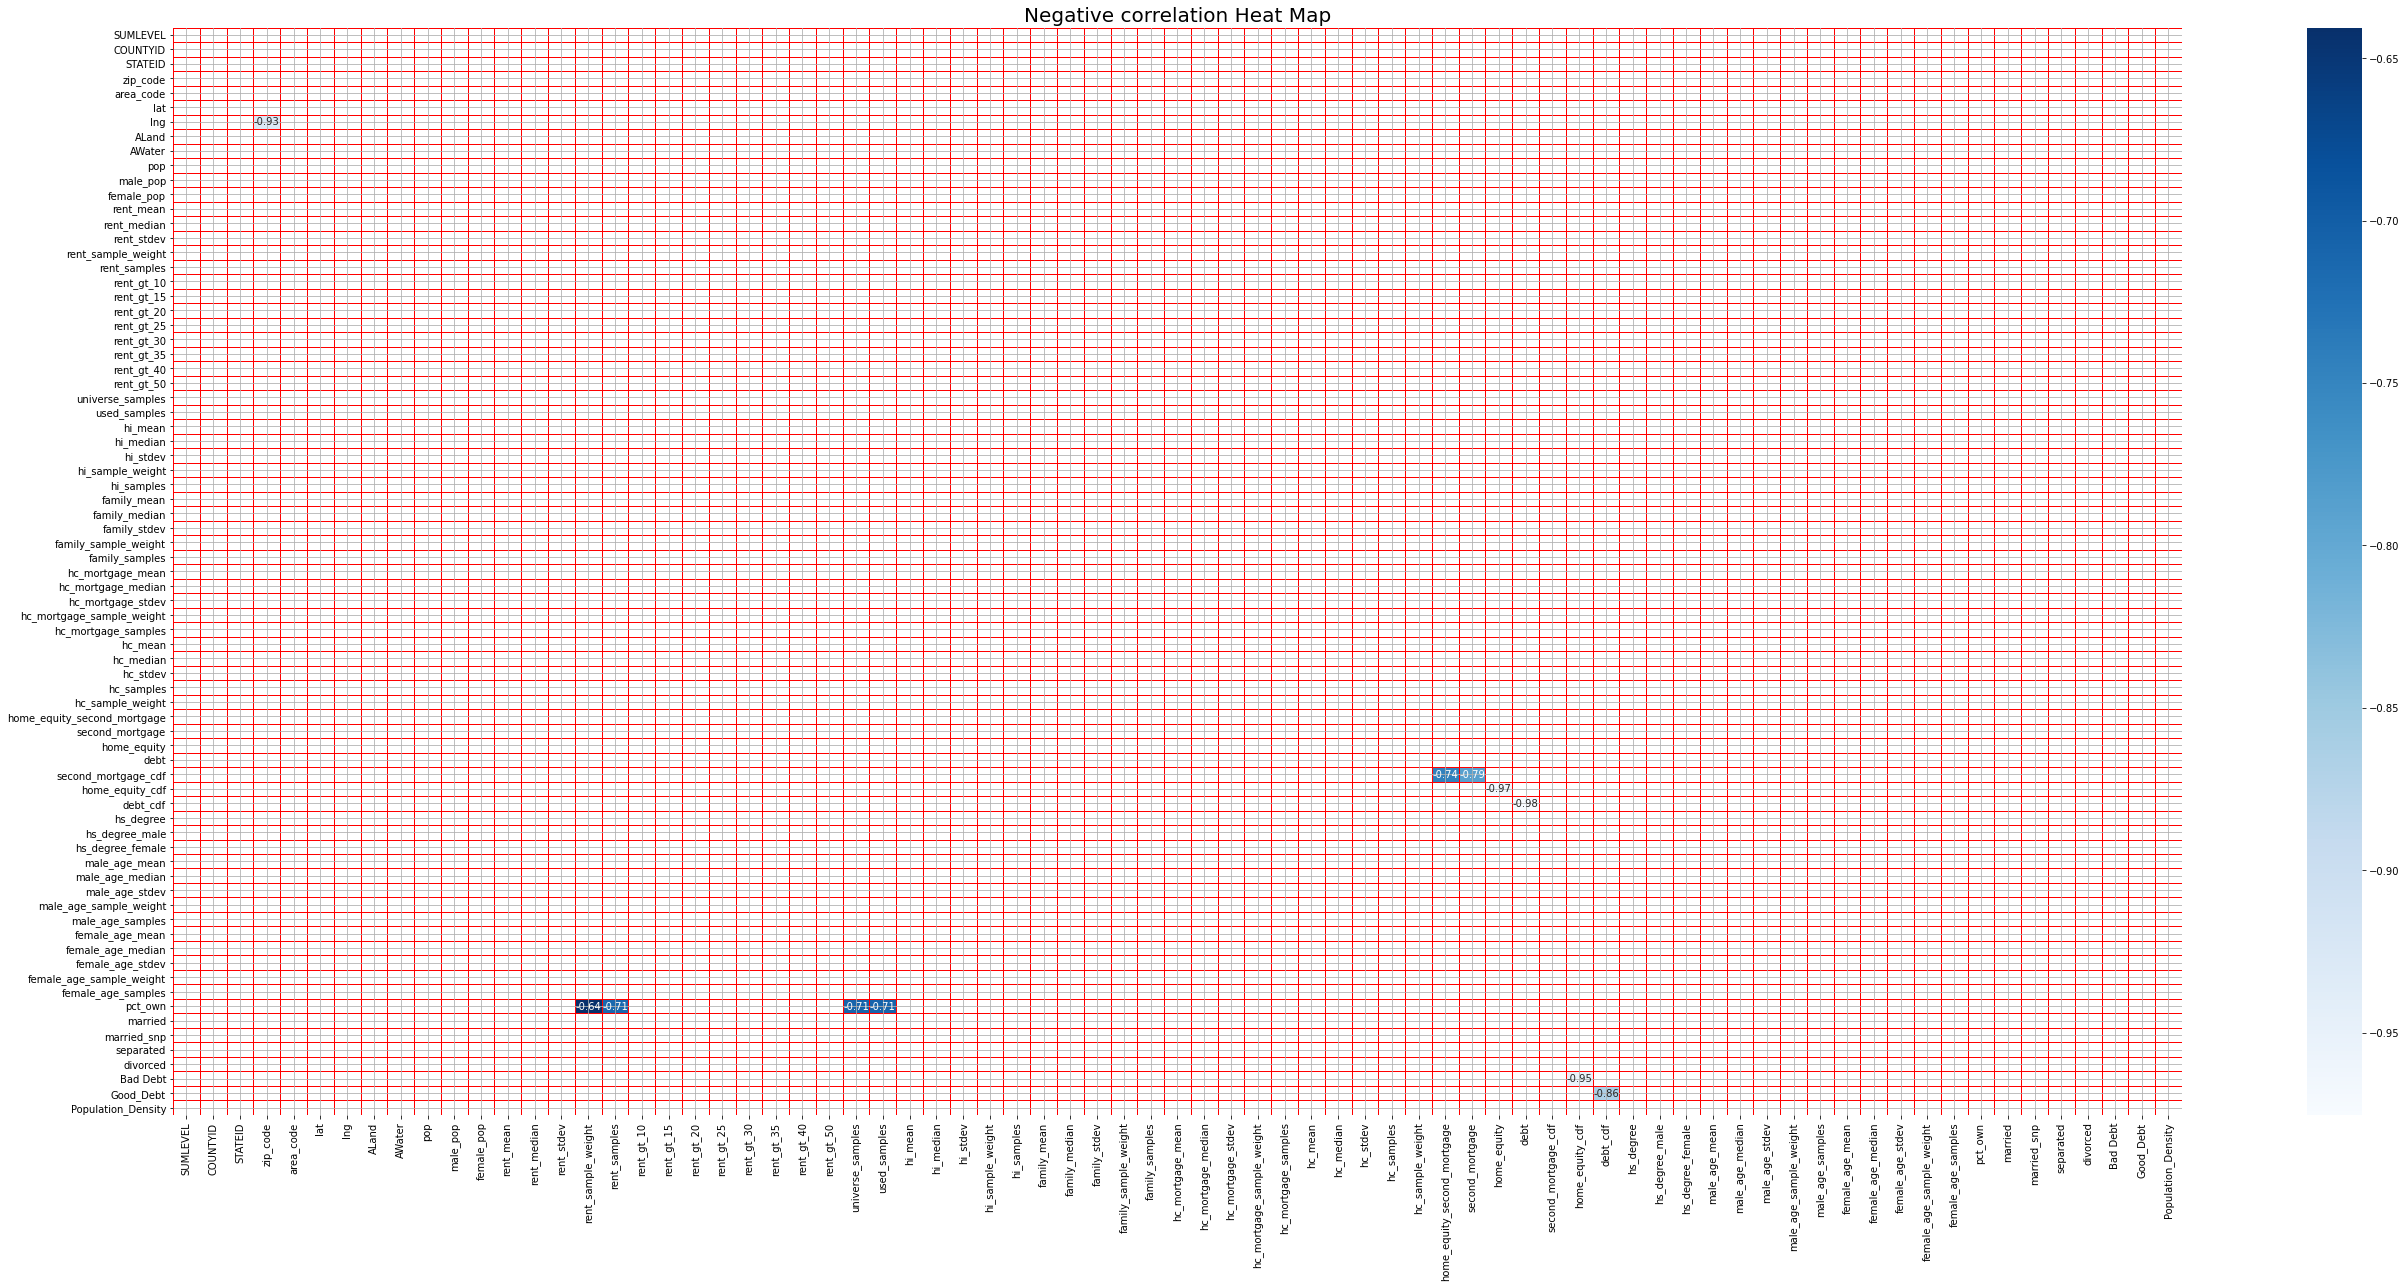

In [60]:
kot = corr[corr <=-.6]
plt.figure(figsize=(45,20))
sns.heatmap(kot, cmap="Blues", annot = True, mask = mask, linewidths=1, linecolor='red').set_title('Negative correlation Heat Map', fontsize = 20)
plt.grid('on', )
plt.show()

In [61]:
high_neg_coll_cols = ['rent_samples', 'home_equity_cdf', 'debt_cdf', 'second_mortgage_cdf']

In [63]:
test.drop(high_neg_coll_cols, axis=1, inplace=True)

In [64]:
train.drop(high_neg_coll_cols, axis=1, inplace=True)

model building

In [66]:
train

SUMLEVEL  COUNTYID  STATEID         state state_ab         city  \
UID                                                                       
267822       140        53       36      New York       NY     Hamilton   
246444       140       141       18       Indiana       IN   South Bend   
245683       140        63       18       Indiana       IN     Danville   
279653       140       127       72   Puerto Rico       PR     San Juan   
247218       140       161       20        Kansas       KS    Manhattan   
...          ...       ...      ...           ...      ...          ...   
279212       140        43       72   Puerto Rico       PR        Coamo   
277856       140        91       42  Pennsylvania       PA    Blue Bell   
233000       140        87        8      Colorado       CO      Weldona   
287425       140       439       48         Texas       TX  Colleyville   
265371       140         3       32        Nevada       NV    Las Vegas   

                   place     type primary  zip_code  area_code        lat  \
UID                                                                         
267822          Hamilton     City   tract     13346        315  42.840812   
246444          Roseland     City   tract     46616        574  41.701441   
245683          Danville     City   tract     46122        317  39.792202   
279653          Guaynabo    Urban   tract       927        787  18.396103   
247218    Manhattan City     City   tract     66502        785  39.195573   
...                  ...      ...     ...       ...        ...        ...   
279212             Coamo    Urban   tract       769        787  18.076060   
277856         Blue Bell  Borough   tract     19422        215  40.158138   
233000      Saddle Ridge     City   tract     80653        970  40.410316   
287425  Colleyville City     Town   tract     76034        817  32.904866   
265371          Paradise     City   tract     89123        702  36.064754   

               lng         ALand    AWater    pop   rent_mean  rent_stdev  \
UID                                                                         
267822  -75.501524  2.021834e+08   1699120   5230   769.38638   232.63967   
246444  -86.266614  1.560828e+06    100363   2633   804.87924   253.46747   
245683  -86.515246  6.956160e+07    284193   6881   742.77365   323.39011   
279653  -66.104169  1.105793e+06         0   2700   803.42018   297.39258   
247218  -96.569366  2.554403e+06         0   5637   938.56493   392.44096   
...            ...           ...       ...    ...         ...         ...   
279212  -66.358379  6.970300e+05         0   1847   439.42839   140.29970   
277856  -75.307271  5.077337e+06     11786   4155  1813.19253   492.92300   
233000 -103.814003  1.323262e+09  17577610   2829   849.39107   336.47530   
287425  -97.162151  1.865230e+07    158882  11542  1972.45746   633.02173   
265371 -115.152237  7.796308e+06         0   3726   949.84199   198.82109   

        rent_sample_weight  rent_gt_10  rent_gt_15  rent_gt_20  rent_gt_25  \
UID                                                                          
267822           272.34441     0.86761     0.79155     0.59155     0.45634   
246444           312.58622     0.97410     0.93227     0.69920     0.69920   
245683           291.85520     0.95238     0.88624     0.79630     0.66667   
279653           259.30316     0.94693     0.87151     0.69832     0.61732   
247218          1005.42886     0.99286     0.98247     0.91688     0.84740   
...                    ...         ...         ...         ...         ...   
279212           170.00000     1.00000     1.00000     1.00000     0.83333   
277856            64.84927     0.85435     0.63261     0.50000     0.37391   
233000           120.91448     0.93846     0.71282     0.54359     0.44615   
287425            19.16328     1.00000     1.00000     0.75796     0.61146   
265371           555.87526     0.94956     0.87779     0.83705     0.63337   

        rent_

In [67]:
cols_to_remove = ['SUMLEVEL', 'COUNTYID', 'STATEID', 'state', 'state_ab', 'city', 
                  'place', 'type', 'primary', 'zip_code', 'area_code', 'lat', 'lng']

train = train.drop(cols_to_remove, 1)
test = test.drop(cols_to_remove, 1)

In [69]:
train.head()

ALand   AWater   pop  rent_mean  rent_stdev  rent_sample_weight  \
UID                                                                             
267822  202183361.0  1699120  5230  769.38638   232.63967           272.34441   
246444    1560828.0   100363  2633  804.87924   253.46747           312.58622   
245683   69561595.0   284193  6881  742.77365   323.39011           291.85520   
279653    1105793.0        0  2700  803.42018   297.39258           259.30316   
247218    2554403.0        0  5637  938.56493   392.44096          1005.42886   

        rent_gt_10  rent_gt_15  rent_gt_20  rent_gt_25  rent_gt_30  \
UID                                                                  
267822     0.86761     0.79155     0.59155     0.45634     0.42817   
246444     0.97410     0.93227     0.69920     0.69920     0.55179   
245683     0.95238     0.88624     0.79630     0.66667     0.39153   
279653     0.94693     0.87151     0.69832     0.61732     0.51397   
247218     0.99286     0.98247     0.91688     0.84740     0.78247   

        rent_gt_35  rent_gt_40  rent_gt_50      hi_mean  hi_median  \
UID                                                                  
267822     0.18592     0.15493     0.12958  63125.28406    48120.0   
246444     0.41235     0.39044     0.27888  41931.92593    35186.0   
245683     0.39153     0.28307     0.15873  84942.68317    74964.0   
279653     0.46927     0.35754     0.32961  48733.67116    37845.0   
247218     0.60974     0.55455     0.44416  31834.15466    22497.0   

           hi_stdev  hi_sample_weight  hi_samples  family_mean  family_median  \
UID                                                                             
267822  49042.01206        1290.96240      2024.0  67994.14790        53245.0   
246444  31639.50203         838.74664      1127.0  50670.10337        43023.0   
245683  56811.62186        1155.20980      2488.0  95262.51431        85395.0   
279653  45100.54010         928.32193      1267.0  56401.68133        44399.0   
247218  34046.50907        1548.67477      1983.0  54053.42396        50272.0   

        family_stdev  family_sample_weight  family_samples  hc_mortgage_mean  \
UID                                                                            
267822   47667.30119             884.33516          1491.0        1414.80295   
246444   34715.57548             375.28798           554.0         864.41390   
245683   49292.67664             709.74925          1889.0        1506.06758   
279653   41082.90515             490.18479           729.0        1175.28642   
247218   39609.12605             244.08903           395.0        1192.58759   

        hc_mortgage_median  hc_mortgage_stdev  hc_mortgage_sample_weight  \
UID                                                                        
267822              1223.0          641.22898                  377.83135   
246444               784.0          482.27020                  316.88320   
245683              1361.0          731.89394                  699.41354   
279653              1101.0          428.98751                  261.28471   
247218              1125.0          327.49674                   76.61052   

        hc_mortgage_samples    hc_mean  hc_median   hc_stdev  hc_samples  \
UID                                                                        
267822                867.0  570.01530      558.0  270.11299       770.0   
246444                356.0  351.98293      336.0  125.40457       229.0   
245683               1491.0  556.45986      532.0  184.42175       538.0   
279653                437.0  288.04047      247.0  185.55887       392.0   
247218                134.0  443.68855      444.0   76.12674       124.0   

        hc_sample_weight  home_equity_second_mortgage  second_mortgage  \
UID                                                                      
267822         499.29293                      0.01588          0.02077   
246444         189.60606                      0

In [ ]:
cols_not_need = ['Bad Debt', 'Good_Debt', 'Population_Density', 'agegroup_male', 'agegroup_female']
train = train.drop(cols_not_need,1)

# Model Building

In [80]:
mortgage_cols = ['hc_mortgage_median', 'hc_mortgage_samples', 'hc_mortgage_sample_weight', 'hc_mortgage_stdev']
train = train.drop(mortgage_cols, 1)
test = test.drop(mortgage_cols, 1)

In [81]:
X = train.drop('hc_mortgage_mean',1)
y = train.hc_mortgage_mean

In [82]:
lr = LinearRegression()

In [83]:
lr.fit(X,y)

LinearRegression()

In [84]:
lr.score(X,y)

0.8561329244977705

In [85]:
X_test, y_test = test.drop('hc_mortgage_mean', 1), test.hc_mortgage_mean

In [86]:
y_pred = lr.predict(X_test)

In [87]:
diff = y_pred-y_test

<AxesSubplot:xlabel='hc_mortgage_mean'>

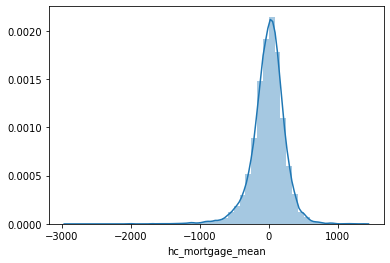

In [88]:
sns.distplot(diff)

<AxesSubplot:xlabel='hc_mortgage_mean'>

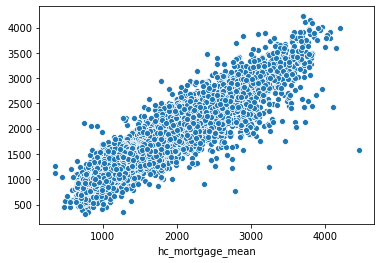

In [89]:
sns.scatterplot(y_test, y_pred)

In [90]:
X_train, y_train = X,y

## Building model again with statsmodels to extract right variables via backward elimination and for making linear regression assumptions valid

### Steps followed for feature selection using Backward Elimination:
1. Using Statsmodels add_constant method, add another constant dimension to the existing data as statsmodel do not provide one
2. Build a linear regression model using OLS Algorithm in statsmodels
3. Verify the p-values for all the variables. 
    a. Null Hypothesis: The independent variable is significant for predicting the dependent variable
    b. Alternate Hypothesis: The independent variable is not significant for predicting the dependent variable
4. Assuming cut-off value as 0.05, if any variable's p-value is greater than 0.05 then we can remove that variable.
5. Also calculate VIF for multi-collinearity check. If the VIF is greater than 10, we can remove the variable, if the VIF is between 5 to 10, take a look into the variable.
6. For my personal preference, for backward elimination, first decided to remove all the variables one by one, until all p values are less than 0.05 and then calculate VIF, but generally, it is better to calculate VIF after building the model immediately. 

In [91]:
X_train_sm = sm.add_constant(X_train)

lm1 = sm.OLS(y_train, X_train_sm).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:       hc_mortgage_mean   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     3510.
Date:                Sun, 30 May 2021   Prob (F-statistic):               0.00
Time:                        21:03:20   Log-Likelihood:            -1.8291e+05
No. Observations:               26585   AIC:                         3.659e+05
Df Residuals:                   26539   BIC:                         3.663e+05
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [92]:
X_train = X_train.drop('rent_gt_35',1)
X_train_sm = sm.add_constant(X_train)
lm2 = sm.OLS(y_train, X_train_sm).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:       hc_mortgage_mean   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     3589.
Date:                Sun, 30 May 2021   Prob (F-statistic):               0.00
Time:                        21:03:24   Log-Likelihood:            -1.8291e+05
No. Observations:               26585   AIC:                         3.659e+05
Df Residuals:                   26540   BIC:                         3.663e+05
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [93]:
X_train = X_train.drop('family_samples',1)
X_train_sm = sm.add_constant(X_train)
lm3 = sm.OLS(y_train, X_train_sm).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:       hc_mortgage_mean   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     3673.
Date:                Sun, 30 May 2021   Prob (F-statistic):               0.00
Time:                        21:03:33   Log-Likelihood:            -1.8291e+05
No. Observations:               26585   AIC:                         3.659e+05
Df Residuals:                   26541   BIC:                         3.663e+05
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [94]:
X_train = X_train.drop('AWater',1)
X_train_sm = sm.add_constant(X_train)
lm2 = sm.OLS(y_train, X_train_sm).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:       hc_mortgage_mean   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     3761.
Date:                Sun, 30 May 2021   Prob (F-statistic):               0.00
Time:                        21:03:33   Log-Likelihood:            -1.8291e+05
No. Observations:               26585   AIC:                         3.659e+05
Df Residuals:                   26542   BIC:                         3.663e+05
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [95]:
X_train = X_train.drop('rent_gt_50',1)
X_train_sm = sm.add_constant(X_train)
lm2 = sm.OLS(y_train, X_train_sm).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:       hc_mortgage_mean   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     3852.
Date:                Sun, 30 May 2021   Prob (F-statistic):               0.00
Time:                        21:03:34   Log-Likelihood:            -1.8291e+05
No. Observations:               26585   AIC:                         3.659e+05
Df Residuals:                   26543   BIC:                         3.662e+05
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [96]:
X_train = X_train.drop('family_sample_weight',1)
X_train_sm = sm.add_constant(X_train)
lm2 = sm.OLS(y_train, X_train_sm).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:       hc_mortgage_mean   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     3949.
Date:                Sun, 30 May 2021   Prob (F-statistic):               0.00
Time:                        21:03:34   Log-Likelihood:            -1.8291e+05
No. Observations:               26585   AIC:                         3.659e+05
Df Residuals:                   26544   BIC:                         3.662e+05
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [97]:
X_train = X_train.drop('family_mean',1)
X_train_sm = sm.add_constant(X_train)
lm2 = sm.OLS(y_train, X_train_sm).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:       hc_mortgage_mean   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     4050.
Date:                Sun, 30 May 2021   Prob (F-statistic):               0.00
Time:                        21:03:34   Log-Likelihood:            -1.8291e+05
No. Observations:               26585   AIC:                         3.659e+05
Df Residuals:                   26545   BIC:                         3.662e+05
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [98]:
X_train = X_train.drop('rent_gt_40',1)
X_train_sm = sm.add_constant(X_train)
lm2 = sm.OLS(y_train, X_train_sm).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:       hc_mortgage_mean   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     4157.
Date:                Sun, 30 May 2021   Prob (F-statistic):               0.00
Time:                        21:03:34   Log-Likelihood:            -1.8291e+05
No. Observations:               26585   AIC:                         3.659e+05
Df Residuals:                   26546   BIC:                         3.662e+05
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [99]:
X_train = X_train.drop('female_age_mean',1)
X_train_sm = sm.add_constant(X_train)
lm2 = sm.OLS(y_train, X_train_sm).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:       hc_mortgage_mean   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     4269.
Date:                Sun, 30 May 2021   Prob (F-statistic):               0.00
Time:                        21:03:34   Log-Likelihood:            -1.8291e+05
No. Observations:               26585   AIC:                         3.659e+05
Df Residuals:                   26547   BIC:                         3.662e+05
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [100]:
X_train = X_train.drop('rent_gt_15',1)
X_train_sm = sm.add_constant(X_train)
lm2 = sm.OLS(y_train, X_train_sm).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:       hc_mortgage_mean   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     4387.
Date:                Sun, 30 May 2021   Prob (F-statistic):               0.00
Time:                        21:03:34   Log-Likelihood:            -1.8291e+05
No. Observations:               26585   AIC:                         3.659e+05
Df Residuals:                   26548   BIC:                         3.662e+05
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [101]:
X_train = X_train.drop('debt',1)
X_train_sm = sm.add_constant(X_train)
lm2 = sm.OLS(y_train, X_train_sm).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:       hc_mortgage_mean   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     4512.
Date:                Sun, 30 May 2021   Prob (F-statistic):               0.00
Time:                        21:03:35   Log-Likelihood:            -1.8291e+05
No. Observations:               26585   AIC:                         3.659e+05
Df Residuals:                   26549   BIC:                         3.662e+05
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [102]:
X_train = X_train.drop('ALand',1)
X_train_sm = sm.add_constant(X_train)
lm2 = sm.OLS(y_train, X_train_sm).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:       hc_mortgage_mean   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     4645.
Date:                Sun, 30 May 2021   Prob (F-statistic):               0.00
Time:                        21:03:35   Log-Likelihood:            -1.8291e+05
No. Observations:               26585   AIC:                         3.659e+05
Df Residuals:                   26550   BIC:                         3.662e+05
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [103]:
X_train = X_train.drop('rent_gt_30',1)
X_train_sm = sm.add_constant(X_train)
lm2 = sm.OLS(y_train, X_train_sm).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:       hc_mortgage_mean   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     4785.
Date:                Sun, 30 May 2021   Prob (F-statistic):               0.00
Time:                        21:03:37   Log-Likelihood:            -1.8292e+05
No. Observations:               26585   AIC:                         3.659e+05
Df Residuals:                   26551   BIC:                         3.662e+05
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [105]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.astype(float).values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

Features     VIF
0                         const  705.35
8                       hi_mean  138.32
9                     hi_median   72.02
15                      hc_mean   36.94
10                     hi_stdev   36.90
16                    hc_median   28.46
19             hc_sample_weight   27.71
12                   hi_samples   27.63
18                   hc_samples   27.20
11             hi_sample_weight   24.23
13                family_median   14.62
14                 family_stdev   14.30
25              male_age_median   14.28
24                male_age_mean   14.10
1                           pop   13.06
20  home_equity_second_mortgage    7.29
21              second_mortgage    7.06
4            rent_sample_weight    5.95
29                      pct_own    5.50
2                     rent_mean    5.22
27            female_age_median    4.14
6                    rent_gt_20    3.47
7                    rent_gt_25    3.43
30                      married    3.42
26               male_age_stdev    2.77
17                     hc_stdev    2.73
23                    hs_degree    2.67
31                  married_snp    2.42
28             female_age_stdev    2.30
3                    rent_stdev    2.16
22                  home_equity    2.14
32                    separated    1.99
33                     divorced    1.66
5                    rent_gt_10    1.33

In [106]:
X_train = X_train.drop('hi_mean',1)
X_train_sm = sm.add_constant(X_train)
lm2 = sm.OLS(y_train, X_train_sm).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:       hc_mortgage_mean   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     4920.
Date:                Sun, 30 May 2021   Prob (F-statistic):               0.00
Time:                        21:04:35   Log-Likelihood:            -1.8295e+05
No. Observations:               26585   AIC:                         3.660e+05
Df Residuals:                   26552   BIC:                         3.662e+05
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [107]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.astype(float).values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

Features     VIF
0                         const  705.26
14                      hc_mean   36.90
15                    hc_median   28.45
18             hc_sample_weight   27.70
11                   hi_samples   27.38
17                   hc_samples   27.18
10             hi_sample_weight   23.59
9                      hi_stdev   23.14
8                     hi_median   19.49
12                family_median   14.46
24              male_age_median   14.27
13                 family_stdev   14.26
23                male_age_mean   14.08
1                           pop   13.03
19  home_equity_second_mortgage    7.29
20              second_mortgage    7.06
4            rent_sample_weight    5.90
28                      pct_own    5.41
2                     rent_mean    4.94
26            female_age_median    4.14
6                    rent_gt_20    3.47
7                    rent_gt_25    3.42
29                      married    3.39
25               male_age_stdev    2.77
16                     hc_stdev    2.73
22                    hs_degree    2.66
30                  married_snp    2.42
27             female_age_stdev    2.30
3                    rent_stdev    2.14
21                  home_equity    2.13
31                    separated    1.99
32                     divorced    1.66
5                    rent_gt_10    1.33

In [108]:
X_train = X_train.drop('hc_mean',1)
X_train_sm = sm.add_constant(X_train)
lm2 = sm.OLS(y_train, X_train_sm).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:       hc_mortgage_mean   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     5014.
Date:                Sun, 30 May 2021   Prob (F-statistic):               0.00
Time:                        21:04:45   Log-Likelihood:            -1.8309e+05
No. Observations:               26585   AIC:                         3.663e+05
Df Residuals:                   26553   BIC:                         3.665e+05
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [109]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.astype(float).values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

Features     VIF
0                         const  704.50
11                   hi_samples   27.37
17             hc_sample_weight   27.02
16                   hc_samples   26.71
10             hi_sample_weight   23.57
9                      hi_stdev   23.13
8                     hi_median   19.41
12                family_median   14.45
23              male_age_median   14.27
13                 family_stdev   14.25
22                male_age_mean   14.08
1                           pop   13.03
18  home_equity_second_mortgage    7.29
19              second_mortgage    7.06
4            rent_sample_weight    5.90
27                      pct_own    5.41
2                     rent_mean    4.93
25            female_age_median    4.14
6                    rent_gt_20    3.47
7                    rent_gt_25    3.42
28                      married    3.39
14                    hc_median    3.28
24               male_age_stdev    2.77
21                    hs_degree    2.66
29                  married_snp    2.42
26             female_age_stdev    2.30
3                    rent_stdev    2.14
20                  home_equity    2.13
30                    separated    1.99
15                     hc_stdev    1.96
31                     divorced    1.66
5                    rent_gt_10    1.33

In [110]:
X_train = X_train.drop('hi_samples',1)
X_train_sm = sm.add_constant(X_train)
lm2 = sm.OLS(y_train, X_train_sm).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:       hc_mortgage_mean   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     5158.
Date:                Sun, 30 May 2021   Prob (F-statistic):               0.00
Time:                        21:04:54   Log-Likelihood:            -1.8315e+05
No. Observations:               26585   AIC:                         3.664e+05
Df Residuals:                   26554   BIC:                         3.666e+05
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [111]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.astype(float).values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

Features     VIF
0                         const  669.01
16             hc_sample_weight   24.98
15                   hc_samples   24.44
9                      hi_stdev   23.08
8                     hi_median   19.10
10             hi_sample_weight   14.30
22              male_age_median   14.27
12                 family_stdev   14.12
21                male_age_mean   14.01
11                family_median   13.99
17  home_equity_second_mortgage    7.28
1                           pop    7.09
18              second_mortgage    7.06
4            rent_sample_weight    5.82
26                      pct_own    5.00
2                     rent_mean    4.90
24            female_age_median    4.12
6                    rent_gt_20    3.47
7                    rent_gt_25    3.41
27                      married    3.37
13                    hc_median    3.23
23               male_age_stdev    2.77
20                    hs_degree    2.48
28                  married_snp    2.38
25             female_age_stdev    2.30
3                    rent_stdev    2.14
19                  home_equity    2.13
29                    separated    1.97
14                     hc_stdev    1.96
30                     divorced    1.65
5                    rent_gt_10    1.33

In [112]:
X_train = X_train.drop('hi_sample_weight',1)
X_train_sm = sm.add_constant(X_train)
lm2 = sm.OLS(y_train, X_train_sm).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:       hc_mortgage_mean   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     5335.
Date:                Sun, 30 May 2021   Prob (F-statistic):               0.00
Time:                        21:05:02   Log-Likelihood:            -1.8315e+05
No. Observations:               26585   AIC:                         3.664e+05
Df Residuals:                   26555   BIC:                         3.666e+05
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [113]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.astype(float).values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

Features     VIF
0                         const  653.51
14                   hc_samples   24.44
15             hc_sample_weight   23.63
9                      hi_stdev   22.97
8                     hi_median   17.33
21              male_age_median   14.25
11                 family_stdev   14.12
10                family_median   13.98
20                male_age_mean   13.93
16  home_equity_second_mortgage    7.28
17              second_mortgage    7.06
25                      pct_own    4.98
2                     rent_mean    4.67
23            female_age_median    4.09
6                    rent_gt_20    3.47
7                    rent_gt_25    3.41
26                      married    3.33
12                    hc_median    3.20
4            rent_sample_weight    3.03
1                           pop    2.93
22               male_age_stdev    2.77
27                  married_snp    2.36
19                    hs_degree    2.34
24             female_age_stdev    2.30
3                    rent_stdev    2.13
18                  home_equity    2.11
28                    separated    1.97
13                     hc_stdev    1.96
29                     divorced    1.64
5                    rent_gt_10    1.33

In [114]:
X_train = X_train.drop('hc_samples',1)
X_train_sm = sm.add_constant(X_train)
lm2 = sm.OLS(y_train, X_train_sm).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:       hc_mortgage_mean   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     5474.
Date:                Sun, 30 May 2021   Prob (F-statistic):               0.00
Time:                        21:05:05   Log-Likelihood:            -1.8326e+05
No. Observations:               26585   AIC:                         3.666e+05
Df Residuals:                   26556   BIC:                         3.668e+05
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [115]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.astype(float).values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

Features     VIF
0                         const  610.51
9                      hi_stdev   22.97
8                     hi_median   17.33
20              male_age_median   14.24
11                 family_stdev   14.11
10                family_median   13.97
19                male_age_mean   13.82
15  home_equity_second_mortgage    7.28
16              second_mortgage    7.05
24                      pct_own    4.97
2                     rent_mean    4.65
22            female_age_median    4.07
6                    rent_gt_20    3.47
7                    rent_gt_25    3.41
25                      married    3.32
14             hc_sample_weight    3.11
4            rent_sample_weight    3.02
21               male_age_stdev    2.77
12                    hc_median    2.61
1                           pop    2.59
26                  married_snp    2.36
18                    hs_degree    2.32
23             female_age_stdev    2.30
3                    rent_stdev    2.13
17                  home_equity    2.11
27                    separated    1.97
13                     hc_stdev    1.94
28                     divorced    1.63
5                    rent_gt_10    1.32

In [116]:
X_train = X_train.drop('hi_stdev',1)
X_train_sm = sm.add_constant(X_train)
lm2 = sm.OLS(y_train, X_train_sm).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:       hc_mortgage_mean   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     5525.
Date:                Sun, 30 May 2021   Prob (F-statistic):               0.00
Time:                        21:05:06   Log-Likelihood:            -1.8356e+05
No. Observations:               26585   AIC:                         3.672e+05
Df Residuals:                   26557   BIC:                         3.674e+05
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [117]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.astype(float).values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

Features     VIF
0                         const  609.38
8                     hi_median   16.77
19              male_age_median   14.23
18                male_age_mean   13.81
9                 family_median   13.31
14  home_equity_second_mortgage    7.28
15              second_mortgage    7.05
23                      pct_own    4.96
2                     rent_mean    4.64
21            female_age_median    4.07
6                    rent_gt_20    3.47
7                    rent_gt_25    3.40
24                      married    3.31
10                 family_stdev    3.18
13             hc_sample_weight    3.11
4            rent_sample_weight    3.01
20               male_age_stdev    2.76
11                    hc_median    2.59
1                           pop    2.59
25                  married_snp    2.35
22             female_age_stdev    2.30
17                    hs_degree    2.27
3                    rent_stdev    2.11
16                  home_equity    2.11
26                    separated    1.97
12                     hc_stdev    1.93
27                     divorced    1.63
5                    rent_gt_10    1.32

In [118]:
X_train = X_train.drop('rent_gt_10',1)
X_train_sm = sm.add_constant(X_train)
lm2 = sm.OLS(y_train, X_train_sm).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:       hc_mortgage_mean   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     5738.
Date:                Sun, 30 May 2021   Prob (F-statistic):               0.00
Time:                        21:05:08   Log-Likelihood:            -1.8356e+05
No. Observations:               26585   AIC:                         3.672e+05
Df Residuals:                   26558   BIC:                         3.674e+05
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [119]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.astype(float).values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

Features     VIF
0                         const  375.16
7                     hi_median   16.72
18              male_age_median   14.23
17                male_age_mean   13.81
8                 family_median   13.31
13  home_equity_second_mortgage    7.28
14              second_mortgage    7.05
22                      pct_own    4.95
2                     rent_mean    4.55
20            female_age_median    4.07
6                    rent_gt_25    3.40
23                      married    3.31
5                    rent_gt_20    3.24
9                  family_stdev    3.18
12             hc_sample_weight    3.10
4            rent_sample_weight    3.01
19               male_age_stdev    2.76
10                    hc_median    2.59
1                           pop    2.58
24                  married_snp    2.35
21             female_age_stdev    2.30
16                    hs_degree    2.26
15                  home_equity    2.10
3                    rent_stdev    2.08
25                    separated    1.97
11                     hc_stdev    1.93
26                     divorced    1.63

In [120]:
X_train = X_train.drop('male_age_mean',1)
X_train_sm = sm.add_constant(X_train)
lm2 = sm.OLS(y_train, X_train_sm).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:       hc_mortgage_mean   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     5967.
Date:                Sun, 30 May 2021   Prob (F-statistic):               0.00
Time:                        21:05:10   Log-Likelihood:            -1.8356e+05
No. Observations:               26585   AIC:                         3.672e+05
Df Residuals:                   26559   BIC:                         3.674e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [121]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.astype(float).values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

Features     VIF
0                         const  322.63
7                     hi_median   16.21
8                 family_median   13.19
13  home_equity_second_mortgage    7.28
14              second_mortgage    7.05
21                      pct_own    4.95
2                     rent_mean    4.49
17              male_age_median    4.34
19            female_age_median    3.86
6                    rent_gt_25    3.40
5                    rent_gt_20    3.24
22                      married    3.23
9                  family_stdev    3.17
12             hc_sample_weight    3.02
4            rent_sample_weight    3.00
18               male_age_stdev    2.76
10                    hc_median    2.59
1                           pop    2.52
23                  married_snp    2.34
20             female_age_stdev    2.29
16                    hs_degree    2.23
15                  home_equity    2.10
3                    rent_stdev    2.08
24                    separated    1.96
11                     hc_stdev    1.93
25                     divorced    1.63

In [122]:
X_train = X_train.drop('hi_median',1)
X_train_sm = sm.add_constant(X_train)
lm2 = sm.OLS(y_train, X_train_sm).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:       hc_mortgage_mean   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     6058.
Date:                Sun, 30 May 2021   Prob (F-statistic):               0.00
Time:                        21:05:11   Log-Likelihood:            -1.8385e+05
No. Observations:               26585   AIC:                         3.678e+05
Df Residuals:                   26560   BIC:                         3.680e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [123]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.astype(float).values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

Features     VIF
0                         const  321.90
12  home_equity_second_mortgage    7.28
13              second_mortgage    7.05
7                 family_median    6.10
20                      pct_own    4.67
16              male_age_median    4.34
18            female_age_median    3.85
2                     rent_mean    3.69
6                    rent_gt_25    3.35
5                    rent_gt_20    3.23
8                  family_stdev    3.14
21                      married    3.10
4            rent_sample_weight    2.98
11             hc_sample_weight    2.88
17               male_age_stdev    2.76
9                     hc_median    2.57
1                           pop    2.43
22                  married_snp    2.34
19             female_age_stdev    2.29
15                    hs_degree    2.23
14                  home_equity    2.09
3                    rent_stdev    2.07
23                    separated    1.96
10                     hc_stdev    1.92
24                     divorced    1.63

In [124]:
X_train = X_train.drop('rent_gt_20',1)
X_train_sm = sm.add_constant(X_train)
lm2 = sm.OLS(y_train, X_train_sm).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:       hc_mortgage_mean   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     6322.
Date:                Sun, 30 May 2021   Prob (F-statistic):               0.00
Time:                        21:05:12   Log-Likelihood:            -1.8385e+05
No. Observations:               26585   AIC:                         3.678e+05
Df Residuals:                   26561   BIC:                         3.679e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [125]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.astype(float).values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

Features     VIF
0                         const  310.31
11  home_equity_second_mortgage    7.28
12              second_mortgage    7.05
6                 family_median    6.07
19                      pct_own    4.67
15              male_age_median    4.34
17            female_age_median    3.85
2                     rent_mean    3.66
7                  family_stdev    3.14
20                      married    3.10
4            rent_sample_weight    2.98
10             hc_sample_weight    2.88
16               male_age_stdev    2.76
8                     hc_median    2.57
1                           pop    2.43
21                  married_snp    2.34
18             female_age_stdev    2.29
14                    hs_degree    2.23
13                  home_equity    2.09
3                    rent_stdev    2.07
22                    separated    1.96
9                      hc_stdev    1.92
23                     divorced    1.62
5                    rent_gt_25    1.30

In [126]:
X_train = X_train.drop('married',1)
X_train_sm = sm.add_constant(X_train)
lm2 = sm.OLS(y_train, X_train_sm).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:       hc_mortgage_mean   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     6608.
Date:                Sun, 30 May 2021   Prob (F-statistic):               0.00
Time:                        21:05:14   Log-Likelihood:            -1.8385e+05
No. Observations:               26585   AIC:                         3.678e+05
Df Residuals:                   26562   BIC:                         3.679e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [127]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.astype(float).values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

Features     VIF
0                         const  309.34
11  home_equity_second_mortgage    7.27
12              second_mortgage    7.05
6                 family_median    6.03
19                      pct_own    4.31
15              male_age_median    3.90
17            female_age_median    3.78
2                     rent_mean    3.64
7                  family_stdev    3.14
4            rent_sample_weight    2.97
10             hc_sample_weight    2.87
8                     hc_median    2.56
16               male_age_stdev    2.50
1                           pop    2.35
20                  married_snp    2.32
18             female_age_stdev    2.28
14                    hs_degree    2.23
13                  home_equity    2.09
3                    rent_stdev    2.04
21                    separated    1.96
9                      hc_stdev    1.92
22                     divorced    1.43
5                    rent_gt_25    1.27

In [128]:
X_train = X_train.drop('home_equity_second_mortgage',1)
X_train_sm = sm.add_constant(X_train)
lm2 = sm.OLS(y_train, X_train_sm).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:       hc_mortgage_mean   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     6880.
Date:                Sun, 30 May 2021   Prob (F-statistic):               0.00
Time:                        21:05:15   Log-Likelihood:            -1.8392e+05
No. Observations:               26585   AIC:                         3.679e+05
Df Residuals:                   26563   BIC:                         3.681e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                606.6861     26

In [129]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.astype(float).values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

Features     VIF
0                const  309.12
6        family_median    6.02
18             pct_own    4.31
14     male_age_median    3.90
16   female_age_median    3.78
2            rent_mean    3.64
7         family_stdev    3.13
4   rent_sample_weight    2.97
10    hc_sample_weight    2.87
8            hc_median    2.56
15      male_age_stdev    2.50
1                  pop    2.35
19         married_snp    2.32
17    female_age_stdev    2.28
13           hs_degree    2.23
3           rent_stdev    2.04
12         home_equity    2.00
20           separated    1.96
9             hc_stdev    1.92
11     second_mortgage    1.45
21            divorced    1.43
5           rent_gt_25    1.27

In [130]:
X_train = X_train.drop('family_median',1)
X_train_sm = sm.add_constant(X_train)
lm2 = sm.OLS(y_train, X_train_sm).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:       hc_mortgage_mean   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     6719.
Date:                Sun, 30 May 2021   Prob (F-statistic):               0.00
Time:                        21:05:16   Log-Likelihood:            -1.8473e+05
No. Observations:               26585   AIC:                         3.695e+05
Df Residuals:                   26564   BIC:                         3.697e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                440.2183     26

In [131]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.astype(float).values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

Features     VIF
0                const  301.74
13     male_age_median    3.90
17             pct_own    3.78
15   female_age_median    3.77
2            rent_mean    3.15
4   rent_sample_weight    2.95
9     hc_sample_weight    2.85
6         family_stdev    2.73
14      male_age_stdev    2.50
7            hc_median    2.36
1                  pop    2.35
18         married_snp    2.31
16    female_age_stdev    2.28
12           hs_degree    2.13
3           rent_stdev    2.02
11         home_equity    1.98
19           separated    1.96
8             hc_stdev    1.91
10     second_mortgage    1.45
20            divorced    1.42
5           rent_gt_25    1.17

In [132]:
X_train = X_train.drop('female_age_median',1)
X_train_sm = sm.add_constant(X_train)
lm2 = sm.OLS(y_train, X_train_sm).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:       hc_mortgage_mean   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     7073.
Date:                Sun, 30 May 2021   Prob (F-statistic):               0.00
Time:                        21:05:17   Log-Likelihood:            -1.8473e+05
No. Observations:               26585   AIC:                         3.695e+05
Df Residuals:                   26565   BIC:                         3.697e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                438.8053     26

In [133]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.astype(float).values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

Features     VIF
0                const  299.32
16             pct_own    3.77
2            rent_mean    3.15
4   rent_sample_weight    2.94
9     hc_sample_weight    2.80
6         family_stdev    2.73
14      male_age_stdev    2.48
7            hc_median    2.36
17         married_snp    2.31
1                  pop    2.29
15    female_age_stdev    2.26
12           hs_degree    2.12
13     male_age_median    2.10
3           rent_stdev    2.02
11         home_equity    1.98
18           separated    1.96
8             hc_stdev    1.91
10     second_mortgage    1.45
19            divorced    1.42
5           rent_gt_25    1.16

In [134]:
cols = X_train.columns

In [135]:
y_train_pred = lm2.predict(X_train_sm)

In [136]:
diff = y_train_pred - y_train

<AxesSubplot:>

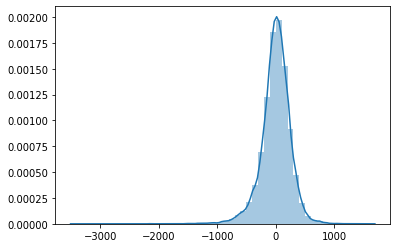

In [137]:
sns.distplot(diff)

<AxesSubplot:ylabel='hc_mortgage_mean'>

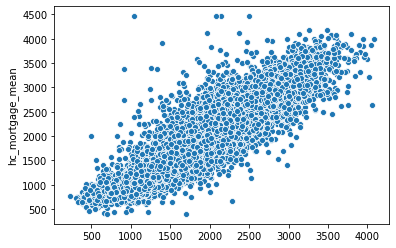

In [138]:

sns.scatterplot(y_train_pred, y_train)

In [139]:
X_test = test[cols]

In [140]:
y_test = test.hc_mortgage_mean

In [141]:
y_test_pred = lm2.predict(sm.add_constant(X_test))

In [142]:
from sklearn.metrics import r2_score

In [143]:
r2_score(y_train, y_train_pred)

0.8349425521899516

In [144]:
r2_score(y_test, y_test_pred)

0.833311328997412

In [237]:
diff = y_test-y_test_pred

<AxesSubplot:>

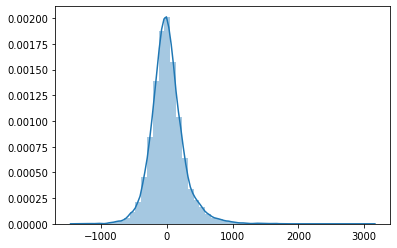

In [239]:
sns.distplot(diff)

<AxesSubplot:ylabel='hc_mortgage_mean'>

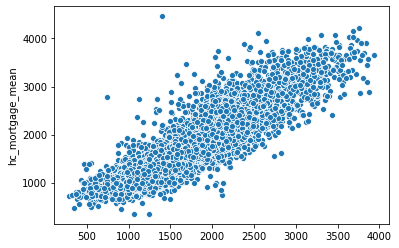

In [240]:
sns.scatterplot(y_test_pred, y_test)

In [241]:
lr = LinearRegression()

In [242]:
lr.fit(X[X_train.columns], y)

LinearRegression()

In [243]:
lr.score(X[X_train.columns], y)

0.8349425521899516

In [244]:
lr.score(X_test, y_test)

0.8333113289974118

In [245]:
from sklearn.model_selection import cross_validate

In [246]:
cross_validate(lr, X_train, y)

{'fit_time': array([0.01452637, 0.01274562, 0.01199913, 0.01905489, 0.01099515]),
 'score_time': array([0.00355768, 0.00351405, 0.0021224 , 0.00298357, 0.00296736]),
 'test_score': array([0.83510332, 0.84063259, 0.82691923, 0.84150267, 0.82818046])}

# Build Decision Tree Regressor

In [145]:
dt = DecisionTreeRegressor()

In [148]:
dt.fit(X_train, y_train)

DecisionTreeRegressor()

In [149]:
dt.score(X_train, y_train)

1.0

In [150]:
dt.score(X_test,y_test)

0.7077725983211808

# Building Regression algo with Random Forest

In [151]:
rf = RandomForestRegressor()

In [156]:
rf.fit(X_train, y_train)

In [153]:
rf.score(X_train, y_train)

0.9795504458646365

In [154]:
rf.score(X_test, y_test)

0.8582481629548365